# Research Title: Sensitivity to the presence and absence of the Andaman-Nicobar Island in the Bay of Bengal's kinematics and thermodynamics



Seasons in the Bay of Bengal:

Summer or South West Monsoon: June - September

Winter or North East Monsoon: November - February
(Pankajakshan et al., 2007; Heather et al., 2019)

Note that, sea surface salinity (SSS) is included in the /kaggle/input/sst-for-validation/nightime_SST, don't become confused with the name. 

In [1]:
import warnings

warnings.filterwarnings("ignore")
!pip install cmaps
!pip install seawater==3.3.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 5.1 MB/s eta 0:00:0000:01


In [2]:
import matplotlib.pyplot as plt


import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.ticker as mticker
import xarray as xr
import numpy as np
import pandas  as pd
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable

import seawater as sw
from seawater.library import T90conv

import cmaps

# blue dark red 18
cmp = cmaps.BlueDarkRed18
cmp

In [21]:
# Define cooridinate


c = xr.open_dataset("/kaggle/input/updated-simulations/croco_avg/croco_avg_Andaman_Necobar_ON.nc")
print("Execute")
lon_rho= c.lon_rho.values[:74,:80]
lat_rho=c.lat_rho.values[:74,:80]
lon_u=c.lon_u.values[:74,:80]
lon_v=c.lon_v.values[:74,:80]
lat_u=c.lat_u.values[:74,:80]
lat_v=c.lat_v.values[:74,:80]
#lon_rho,lat_rho,lon_u,lon_v,lat_u,lat_v
lon_u.shape, c.lon_u.values.shape, c.lat_u.shape

Execute


((74, 80), (75, 80), (75, 80))

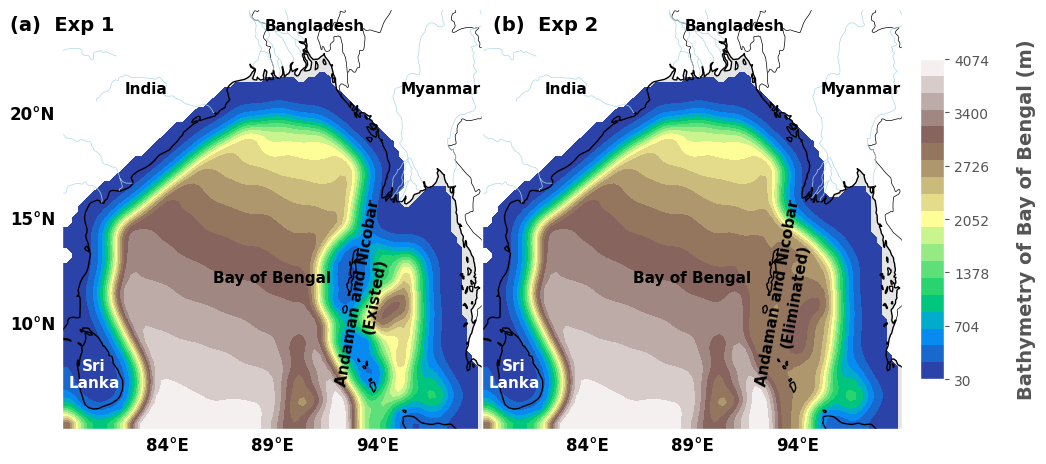

In [224]:
# creating study domain plot

# Reading grid data

# Experiment 1: Andaman Necobar is existed in the domain
# Experiment 2: Andaman Necobar is eleiminated from the domain

ex1bathy = xr.open_dataset("/kaggle/input/grid-updated/grid_updated/croco_grd_AN_on.nc").h.values[:74,:80]
ex2bathy = xr.open_dataset("/kaggle/input/grid-updated/grid_updated/croco_grd_AN_off.nc").h.values[:74,:80]


#import cartopy.io.img_tiles as cimgt

#tile = cimgt.GoogleTiles(style = "street")


topo = np.array([ex1bathy,ex2bathy])

output = "/kaggle/working/"

from matplotlib import gridspec

plt.style.use('ggplot')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

seq = ["(a)","(b)"]
ex = [" Exp 1"," Exp 2"]


def bathymetry(data, lon = lon_rho, lat = lat_rho, adjust = 0.6, title = "Bathymetry of Bay of Bengal (m)", \
               colormap = cmp, scale = 20):
  
    
  ti = title.split()

  nrow = 1
  ncol = 2

  
  vmi = 30
  vmx = np.nanmax(data)
  gap = int((vmx-vmi)/6)  
   
  clab = title

  #eName
  fig = plt.figure(figsize=((ncol+1)*4, (nrow+1)*4))



  gs = gridspec.GridSpec(nrow, ncol,wspace=0,
                         hspace=0, top=1.-adjust/(nrow+1), 
                         bottom=adjust/(nrow+1), left=0.15, right=0.85)
  #gs = gridspec.GridSpec(nrow, ncol,wspace=0.0, hspace=0.0, top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), left=0.5/(ncol+1), right=1-0.5/(ncol+1))


  j = -1
  for i in range(nrow):
    for k in range(ncol):
      j+=1
      ax = plt.subplot(gs[i,k], projection=ccrs.PlateCarree())
      #ax.add_image(tile, 8)
      
      extent = [79,99,5,25]
      ax.set_extent([79, 99, 5, 25], ccrs.PlateCarree())


      ax.add_feature(cfeature.LAND, color = 'white')
      ax.add_feature(cfeature.COASTLINE, color = 'k', linewidth = 1)
      ax.add_feature(cfeature.BORDERS, color = 'k', linewidth = 0.5)
      ax.add_feature(cfeature.RIVERS, color = "lightblue", linewidth = 0.5)
      

      #ax.set_xticks(np.arange(78,100,5))
      #ax.set_yticks([5,9, 13, 17, 21, 25])

      #ax.set_yticklabels([])
      #ax.set_xticklabels([])

      gl = ax.gridlines()
      gl.top_labels = False
      gl.xlines = False
      gl.ylines = False
      
      
    

      if j in [1,2]:
        
        gl.bottom_labels = True
        gl.left_labels = False
        
      elif j ==0:
        
        gl.bottom_labels = True
        gl.left_labels = True
        

          
      gl.xlocator = mticker.FixedLocator(np.arange(79,100,5))
      gl.ylocator = mticker.FixedLocator(np.arange(5,25,5))
        
      gl.xlabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
      gl.ylabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
    
     
      dt = data[k,:,:].copy()
      dt[dt>=vmx] = vmx
      dt[dt<=vmi] = np.nan

       
      m = ax.contourf(lon, lat, dt,cmap = colormap, 
                            transform = ccrs.PlateCarree(),extent = extent,
                            vmin = vmi, vmax = vmx,
                            levels = np.linspace(vmi, vmx, scale))
      """plt.clabel(plt.contour(lon,lat,dt,colors = "k", 
                             transform = ccrs.PlateCarree(),extent = extent,
                             vmin = vmi,
                             vmax = vmx,
                             levels = np.arange(vmi,
                                                vmx,gap)),
                             fontsize = 10, colors = 'k')"""
     

      if j ==0:
          lbpos = extent[0]
          AN = "Andaman and Nicobar\n(Existed)"
      else: 
          lbpos = extent[0]+3
          AN = "Andaman and Nicobar\n(Eliminated)" 
          
      ax.text(lbpos,24,"{}".format(seq[j]+" "+ex[j]), 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 14)
      ax.text(sum(extent[:2])/2+2,24,"Bangladesh", 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 11)

      ax.text(sum(extent[:2])/2-6,21,"India", 
                fontweight = 'bold', 
                horizontalalignment='center',fontsize = 11)

      ax.text(sum(extent[:2])/2+8,21,"Myanmar", 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 11)

      ax.text(sum(extent[:2])/2,12,"Bay of Bengal", 
                fontweight = 'bold', 
                horizontalalignment='center',fontsize = 11)
      ax.text(sum(extent[:2])/2+4.5,7,AN,
                fontweight = 'bold', rotation = 80,
                horizontalalignment='center',fontsize = 11)
      ax.text(sum(extent[:2])/2-8.5,7,"Sri\nLanka", 
                 fontweight = 'bold',color = "white", 
                horizontalalignment='center',fontsize = 11)
        
      

  #plt.suptitle("{}".format(title), fontsize = 20, fontweight = "bold")
  cbar_ax = fig.add_axes([0.865, 0.3, 0.02, 0.4]) # [left,bottom,width,height]
  #cbar_ax = fig.add_axes([0.865, 0.37, 0.015, 0.25]) # [left,bottom,width,height]
  
  if not gap: pass  
  elif gap>=1:
        cb = fig.colorbar(m,  cax=cbar_ax,
                   ticks = [int(i) for i in np.arange(vmi,vmx+1,gap)])
        cb.set_label(clab, rotation = 90, fontweight = 'bold',
               fontsize = 14, labelpad = 20)
  else:
        cb = fig.colorbar(m,  cax=cbar_ax,
                   ticks = [round(i,2) for i in np.arange(vmi,vmx+gap,gap)])
        cb.set_label(clab, rotation = 90, fontweight = 'bold',
               fontsize = 14, labelpad = 20)
        

    
  
  plt.savefig(output+"_".join(title.split()),dpi = 300)
  plt.show()


bathymetry(topo, adjust = 0.45, colormap = "terrain")

# The code was transferred into local computer starts from here

In [4]:

# Calling function more than one is going in vain for some unknown reason

def read_data(path):
    fs = xr.open_dataset(path)
  
    u = fs.u.values[1:14,-1,:74,:80]
    u[u==0] = np.nan
    v = fs.v.values[1:14,-1,:74,:80]
    v[v==0] = np.nan
  
    temp = fs.temp.values[1:14,-1,:74,:80]
    temp[temp==0]=np.nan
    salt = fs.salt.values[1:14,-1,:74,:80]
    salt[salt==0]=np.nan
    
    wsu = fs.sustr.values[1:14, :74,:80]
    wsu[wsu ==0] = np.nan
    wsv = fs.svstr.values[1:14,:74,:80]
    wsv[wsv==0] = np.nan
    elevation = fs.zeta.values[1:14,:74,:80]
    elevation[elevation==0] = np.nan
        
    return u,v,temp,salt, wsu, wsv, elevation


# Call the read data experiment1

# Andaman and Necobar existed
path1 = "/kaggle/input/experiment-with-andaman-necobar-2/croco_avg_Andaman_Necobar_ON.nc" 

# Andaman and Necobar eliminated
path2 = "/kaggle/input/experiment-with-andaman-necobar-2/croco_avg_Andaman_Necobar_off.nc"


# read data
ex1 = read_data(path1)
ex2 = read_data(path2)


time = np.arange(1,15,1)
u1,v1,temp1,salt1, wsu1,wsv1,elev1 = ex1
u2,v2,temp2,salt2, wsu2,wsv2,elev2 = ex2

In [134]:
def reverse(data_):
    
    data = np.zeros(data_.shape[:][::-1])

    dt = data_.copy()

    for i in range(data_.shape[0]):
        for j in range(data_.shape[1]):
            data[j,i] = dt[i,j]

    return data

def extract(data,val, depth = True, timedata = True, lat = False, lon = False,\
            ifreverse = False):
    # val is a variable name of provided data file 

    if timedata:
        if depth==True:
            val1 = data[val].values[:,0,:,:]
        else:
            val1 = data[val].values
        if lat and lon:
            val1 = val1[:,lat[0]:lat[1],lon[0]:lon[1]]
        if ifreverse:
            val1 = np.array([reverse(val1[i, :,:]) for i in range(val1.shape[0])])
        
    else:
       
        val1 = data[val].values[0,:,:]
        if lat and lon:
            val1 = val1[lat[0]:lat[1],lon[0]:lon[1]]
        if ifreverse:
            
            val1 = reverse(val1[ :,:])
        

    val1[val1==0] = np.nan
        
    return val1


In [40]:
# Export ocean velocity into csv for the interpolation with matlab


newX_ = np.hstack([j for j in [i for i in lon_u[:,:]]])
newY_ = np.hstack([j for j in [i for i in lat_u[:,:]]])

for k in range(len(u1)):

    newCu1 = np.hstack([j for j in [i for i in u1[k,:,:]]])
    
    pdf  = pd.DataFrame({"lon":newX_, "lat":newY_, "u":newCu1})
    pdf.to_csv("/kaggle/working/sim1u_time_{}.csv".format(k),index = False)

    newCu2 = np.hstack([j for j in [i for i in u2[k,:,:]]])
    
    pdf  = pd.DataFrame({"lon":newX_, "lat":newY_, "u":newCu2})
    pdf.to_csv("/kaggle/working/sim2u_time_{}.csv".format(k),index = False)

newX_ = np.hstack([j for j in [i for i in lon_v[:,:]]])
newY_ = np.hstack([j for j in [i for i in lat_v[:,:]]])

for k in range(len(v1)):

    newCv1 = np.hstack([j for j in [i for i in v1[k,:,:]]])
    
    pdf  = pd.DataFrame({"lon":newX_, "lat":newY_, "v":newCv1})
    pdf.to_csv("/kaggle/working/sim1v_time_{}.csv".format(k),index = False)

    newCv2 = np.hstack([j for j in [i for i in v2[k,:,:]]])
    
    pdf  = pd.DataFrame({"lon":newX_, "lat":newY_, "v":newCv2})
    pdf.to_csv("/kaggle/working/sim2v_time_{}.csv".format(k),index = False)





<Axes: xlabel='lon', ylabel='lat'>

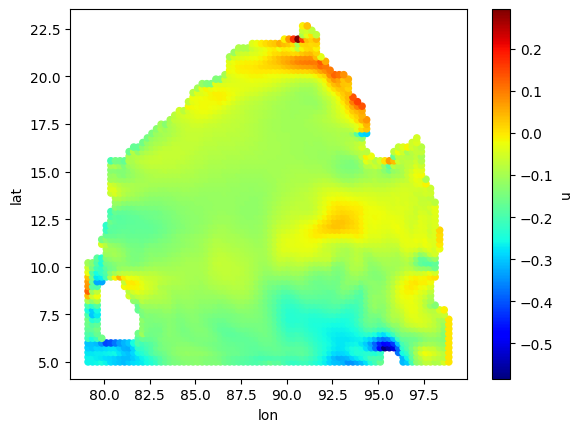

In [67]:
# Always verify the conversion

pdf = pd.read_csv("/kaggle/working/sim2u_time_0.csv")

pdf.plot(kind = "scatter", x = "lon", y = "lat", c = "u", cmap = "jet")


In [25]:
# Extract copernicus

coperp = "/kaggle/input/croco-andaman-exp-validation/validation/ocean_current/ocean_current.nc"
coper = xr.open_dataset(coperp)
coperlat = coper.latitude.values
coperlon = coper.longitude.values

copers = []

for i in ["uo","vo"]:
    copers.append(extract(coper,i, ifreverse= False))
    
coperu,coperv = copers[0][:,63:271,27:259], copers[1][:,63:271,27:259]

X = coperlon[list(coperlon).index(79.25): list(coperlon).index(98.5)+1].copy()
Y = coperlat[list(coperlat).index(5.25):list(coperlat).index(22.5)+1].copy()

newX_ = np.hstack([X for i in range(len(Y))])
newY_ = np.hstack([[Y[j] for i in range(len(X))] for j in range(len(Y))])

for k in range(len(coperu)):

    newCu = np.hstack([j for j in [i for i in coperu[k,:,:]]])
    newCv = np.hstack([j for j in [i for i in coperv[k,:,:]]])
    
    pdf  = pd.DataFrame({"lon":newX_, "lat":newY_, "u":newCu, "v":newCv})
    pdf.to_csv("/kaggle/working/coper_time_{}.csv".format(k),index = False)



In [126]:
# Flatten simulated salinity data for the MATLAB interpolation
newX_ = np.hstack([j for j in [i for i in lon_rho[:,:]]])
newY_ = np.hstack([j for j in [i for i in lat_rho[:,:]]])

for k in range(len(salt1)):

    newS1 = np.hstack([j for j in [i for i in salt1[k,:,:]]])
    
    pdf  = pd.DataFrame({"lon":newX_, "lat":newY_, "sss":newS1})
    pdf.to_csv("/kaggle/working/sim1sss_time_{}.csv".format(k),index = False)

    newS2 = np.hstack([j for j in [i for i in salt2[k,:,:]]])
    
    pdf  = pd.DataFrame({"lon":newX_, "lat":newY_, "v":newS2})
    pdf.to_csv("/kaggle/working/sim2sss_time_{}.csv".format(k),index = False)



In [125]:
# rempote sensing salinity
rootSR = "/kaggle/input/sst-for-validation/nightime_SST/"
pathSSSR = [rootSR+i for i in os.listdir(rootSR)]
pathSSSR.sort()

pathSSSR = pathSSSR[1:-1]
sssR = []
for i in range(len(pathSSSR)):
    sRS = xr.open_dataset(pathSSSR[i])
    sssR.append(sRS.sss_smap.values[379:455,315:411])

    if i==0:
        Y = sRS.lat.values[379:455]
        X = sRS.lon.values[315:411]
        
sssR =np.array(sssR)

#list(lat_).index(23.875), list(lat_).index(4.875),list(lon_).index(78.875), list(lon_).index(102.875)


# Export remote sensing SSS into csv for the interpolation with matlab


newX_ = np.hstack([X for i in range(len(Y))])
newY_ = np.hstack([[Y[j] for i in range(len(X))] for j in range(len(Y))])

for k in range(len(sssR)):

    newSSS = np.hstack([j for j in [i for i in sssR[k,:,:]]])
    
    pdf  = pd.DataFrame({"lon":newX_, "lat":newY_, "sss":newSSS})
    pdf.to_csv("/kaggle/working/sss_RS_time_{}.csv".format(k),index = False)
    
    

In [127]:
# Flatten simulated temperature data for the MATLAB interpolation
newX_ = np.hstack([j for j in [i for i in lon_rho[:,:]]])
newY_ = np.hstack([j for j in [i for i in lat_rho[:,:]]])

for k in range(len(temp1)):

    newT1 = np.hstack([j for j in [i for i in temp1[k,:,:]]])
    
    pdf  = pd.DataFrame({"lon":newX_, "lat":newY_, "sss":newT1})
    pdf.to_csv("/kaggle/working/sim1sst_time_{}.csv".format(k),index = False)

    newT2 = np.hstack([j for j in [i for i in temp2[k,:,:]]])
    
    pdf  = pd.DataFrame({"lon":newX_, "lat":newY_, "v":newT2})
    pdf.to_csv("/kaggle/working/sim2sst_time_{}.csv".format(k),index = False)



In [15]:
# Extract sst copernicus

coperp = "/kaggle/input/glorys-sst/glorys_sst.nc"
coper = xr.open_dataset(coperp)
coperlat = coper.latitude.values
coperlon = coper.longitude.values

copers = []

coperSST = extract(coper,"thetao", ifreverse= False)[:,63:271,27:259]

X = coperlon[list(coperlon).index(79.25): list(coperlon).index(98.5)+1].copy()
Y = coperlat[list(coperlat).index(5.25):list(coperlat).index(22.5)+1].copy()

newX_ = np.hstack([X for i in range(len(Y))])
newY_ = np.hstack([[Y[j] for i in range(len(X))] for j in range(len(Y))])

for k in range(len(coperSST)):

    newCSST = np.hstack([j for j in [i for i in coperSST[k,:,:]]])
    
    
    pdf  = pd.DataFrame({"lon":newX_, "lat":newY_, "sst":newCSST})
    pdf.to_csv("/kaggle/working/coperSST_time_{}.csv".format(k),index = False)



NameError: name 'extract' is not defined

# The code that was transferred into local computer ends in here

In [3]:
# South West (SW), boreal summer: June-September: 5:9
# October: 9 
# North East (NE), boreal winter: November-February: 10: + :2
# March-May: 2:5

# Reference: Mesoscale Eddy Variability and its Linkage to Deep Convection
# over the Bay of Bengal using Satellite Altimetric Observations. 
# Heather el al., 2019


def seasonal_group(tup_data):

    seasons = []
    for j in range(len(tup_data)):
        i = tup_data[j]
        march_may = np.nanmean(i[2:5,:,:], axis = 0)
        jun_sep = np.nanmean(i[5:9,:,:],axis = 0)
        oct = i[9,:,:]
        nov_feb = (np.nanmean(i[10:,:,:],axis = 0)+np.nanmean(i[:2,:,:],axis=0))/2
        
        seasons.append([np.array([march_may,jun_sep,oct,nov_feb])]) 
    return seasons
    


In [4]:
# Extract interpolated u,v

glorys = xr.open_dataset("/kaggle/input/interpolated-updated-simulation-validation-data/interpolated_updated_simulation/GLORYS_u_v.nc")
exp1 = xr.open_dataset("/kaggle/input/interpolated-simulation-29-june/exp1_u_v.nc")
exp2 = xr.open_dataset("/kaggle/input/interpolated-simulation-29-june/exp2_u_v.nc")

glorysu = glorys.u.values
glorysv = glorys.v.values

u1 = exp1.u.values
v1 = exp1.v.values
u2 = exp2.u.values
v2 = exp2.v.values


lat = exp1.lat.values
lon = exp1.lon.values

us = np.array(seasonal_group([glorysu,u1,u2]))[:,0,:,:,:]
vs = np.array(seasonal_group([glorysv,v1,v2]))[:,0,:,:,:]

us.shape,vs.shape

((3, 4, 70, 78), (3, 4, 70, 78))

In [5]:
# Extract interpolated SST, SSS

glorys_sst_sss = xr.open_dataset("/kaggle/input/interpolated-updated-simulation-validation-data/interpolated_updated_simulation/glorys_sst_sss.nc")

#smap_smos_in-situ_SSS, AVHRR_Pathfinder_SST 
RS_sst_sss = xr.open_dataset("/kaggle/input/interpolated-updated-simulation-validation-data/interpolated_updated_simulation/multi_sensor_sss_pathfinder_sst.nc")

exp1_sst_sss = xr.open_dataset("/kaggle/input/interpolated-simulation-29-june/exp1_sst_sss.nc")
exp2_sst_sss = xr.open_dataset("/kaggle/input/interpolated-simulation-29-june/exp2_sst_sss.nc")


glorysSST = glorys_sst_sss.sst.values
glorysSSS = glorys_sst_sss.sss.values
smap_smos_insitu_SSS = RS_sst_sss.sss.values
avhrr_pathfinder_SST = RS_sst_sss.sst.values


s1 = exp1_sst_sss.sss.values
s2 = exp2_sst_sss.sss.values
t1 = exp1_sst_sss.sst.values
t2 = exp2_sst_sss.sst.values


lat = exp1_sst_sss.lat.values
lon = exp1_sst_sss.lon.values

ss = np.array(seasonal_group([glorysSSS,smap_smos_insitu_SSS,s1,s2]))[:,0,:,:,:]
ts = np.array(seasonal_group([glorysSST,avhrr_pathfinder_SST,t1,t2]))[:,0,:,:,:]



np.nanmean(avhrr_pathfinder_SST), ss.shape,ts.shape

(28.61933, (4, 4, 70, 78), (4, 4, 70, 78))

In [6]:
# Reading grid data

# Experiment 1: Andaman Necobar is existed in the domain
# Experiment 2: Andaman Necobar is eleminated from the domain

output = "/kaggle/working/"
 
from matplotlib import gridspec

plt.style.use('ggplot')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

seq = ["("+i+")" for i in "abcdefghijkl"]
ex = [" GLORYS"," Exp-1"," Exp-2"]
ses = [" March-May", " Jun-Sep"," Oct"," Nov-Feb",]


def plot2d(uv, data, title,nrow = 3,ex = ex,seq = seq,vmx=None, vmi = None, lon = lon, lat = lat, adjust = 0.6,\
               colormap = cmp, scale = 20):
  
  
 

  if not vmi:
      vmi = np.nanmin(data)
  if not vmx:
      vmx = np.nanmax(data)

  data[data>=vmx]=vmx
  #data[data<=vmi]=vmi

  if len(data.shape)==3:
      gap = (vmx-vmi)/6
  else:
      gap = np.round((vmx-vmi)/6,2)

  if len(data.shape)==3:
      clab = title
  else:
      clab = title.split("_")[1]
      
  extent = np.nanmin(lon), np.nanmax(lon), np.nanmin(lat), np.nanmax(lat)+2

  
  ncol = 4

  
  

  #eName
  fig = plt.figure(figsize=((ncol+1)*4, (nrow+1)*4))



  gs = gridspec.GridSpec(nrow, ncol,wspace=0,
                         hspace=0, top=1.-adjust/(nrow+1), 
                         bottom=adjust/(nrow+1), left=0.15, right=0.85)
  #gs = gridspec.GridSpec(nrow, ncol,wspace=0.0, hspace=0.0, top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), left=0.5/(ncol+1), right=1-0.5/(ncol+1))


  j = -1
  for i in range(nrow):
    for k in range(ncol):
      j+=1
      ax = plt.subplot(gs[i,k], projection=ccrs.PlateCarree())
      #ax.add_image(tile, 8)
      
    
      ax.set_extent([extent[0],extent[1],extent[2],extent[3]], ccrs.PlateCarree())


      ax.add_feature(cfeature.LAND, color = 'white')
      ax.add_feature(cfeature.COASTLINE, color = 'k', linewidth = 1)
      ax.add_feature(cfeature.BORDERS, color = 'k', linewidth = 1)
      #ax.add_feature(cfeature.RIVERS, color = "lightblue", linewidth = 0.5)
      

      #ax.set_xticks(np.arange(78,100,5))
      #ax.set_yticks([5,9, 13, 17, 21, 25])

      #ax.set_yticklabels([])
      #ax.set_xticklabels([])

      gl = ax.gridlines()
      gl.top_labels = False
      gl.xlines = False
      gl.ylines = False
      
      
    
      
      if j in [1,2,3,5,6,7,9,10,11]:
        
        gl.bottom_labels = False
        gl.left_labels = False
        
      elif j in [0,4,8]:
        
        gl.bottom_labels = False
        gl.left_labels = True
      elif j == 12:
        
        gl.bottom_labels = True
        gl.left_labels = True
      elif j in [13,14,15]:
        
        gl.bottom_labels = True
        gl.left_labels = False
      if nrow==3:
        if j in [1,2,3,5,6,7]:
            gl.bottom_labels = False
            gl.left_labels = False
        elif j in [0,4]:
        
            gl.bottom_labels = False
            gl.left_labels = True
        elif j == 8:
        
            gl.bottom_labels = True
            gl.left_labels = True
        elif j in [9,10,11]:
        
            gl.bottom_labels = True
            gl.left_labels = False
        

          
      gl.xlocator = mticker.FixedLocator(np.arange(int(extent[0]),int(extent[1]),4))
      gl.ylocator = mticker.FixedLocator(np.arange(int(extent[2]),int(extent[3]),3))
        
      gl.xlabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
      gl.ylabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
      data[data<=vmi]=vmi
    
     
      if len(data.shape)==3:
          
          m = ax.contourf(lon, lat, data[i,:,:],cmap = colormap, 
                            transform = ccrs.PlateCarree(),extent = extent,
                            vmin = vmi, vmax = vmx,
                            levels = np.linspace(vmi, vmx+(vmx-vmi)/scale, scale))
          
      
      else:
          m = ax.contourf(lon, lat, data[i,k,:,:],cmap = colormap, 
                            transform = ccrs.PlateCarree(),extent = extent,
                            vmin = vmi, vmax = vmx,
                            levels = np.linspace(vmi, vmx+0.01, scale))

      if uv is not None:
          dt = uv[i,:,k,:,:].copy()
     
          u,v = dt[0,:,:],dt[1,:,:]
          ax.streamplot(lon,lat,u,v,color = "k")
      """plt.clabel(plt.contour(lon,lat,dt,colors = "k", 
                             transform = ccrs.PlateCarree(),extent = extent,
                             vmin = vmi,
                             vmax = vmx,
                             levels = np.arange(vmi,
                                                vmx,gap)),
                             fontsize = 10, colors = 'k')"""
      ax.text(sum(extent[:2])/2,26,"{}".format(seq[j]+ex[i]+ses[k]), 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 14)
      
      

  #plt.suptitle("{}".format(title), fontsize = 20, fontweight = "bold")
  cbar_ax = fig.add_axes([0.865, 0.3, 0.02, 0.4]) # [left,bottom,width,height]
  #cbar_ax = fig.add_axes([0.865, 0.37, 0.015, 0.25]) # [left,bottom,width,height]
  
  if not gap: pass  
  elif gap>=1:
        cb = fig.colorbar(m,  cax=cbar_ax,
                   ticks = [round(i,2) for i in np.linspace(vmi,vmx+1,scale)])
        cb.set_label(clab, rotation = 90, fontweight = 'bold',
               fontsize = 18, labelpad = 20)
  else:
        cb = fig.colorbar(m,  cax=cbar_ax,
                   ticks = [round(i,2) for i in np.arange(vmi,vmx+gap,gap)])
        cb.set_label(clab, rotation = 90, fontweight = 'bold',
               fontsize = 18, labelpad = 20)
  if title.split("_")[1][:3]=="sea":
      
        cb = fig.colorbar(m,  cax=cbar_ax,
                ticks = np.linspace(vmi,vmx+0.01,scale))
        cb.set_label(clab, rotation = 90, fontweight = 'bold',
               fontsize = 14, labelpad = 20)

    
  if len(data.shape)==3:
      plt.savefig(output+"ocean_current_vs_f_by_H"+".jpg",dpi = 300)
  else:
      plt.savefig(output+title.split("_")[1]+".jpg",dpi = 300)
  plt.show()


def prepareData(us,vs,data=None):
    uv = np.array([np.array([us[0,:4,:,:],vs[0][:4,:,:]]),
                 np.array([us[1,:4,:,:],vs[1][:4,:,:]]),
                 np.array([us[2,:4,:,:],vs[2][:4,:,:]])])
    if type(data) == type(None):
        data = np.array([(i[0]**2+i[1]**2)**0.5 for i in uv])

    return uv,data


In [7]:


uv,data = prepareData(us,vs)


# us,vs

# Fix the velocity lab

plot2d(uv, data,vmx = 0.5,title = "_Velocity $(ms^{-1})$", adjust = 0.45, \
       colormap = cmp, scale = 30)

In [17]:
us = np.array(seasonal_group([glorysu,glorysu,u1,u2]))[:,0,:,:,:]
vs = np.array(seasonal_group([glorysv,glorysv,v1,v2]))[:,0,:,:,:]

uv = np.array([np.array([us[0,:,:,:],vs[0,:,:,:]]),
                 np.array([us[1,:,:,:],vs[1,:,:,:]]),
                 np.array([us[2,:,:,:],vs[2,:,:,:]]),
              np.array([us[3,:,:,:],vs[3,:,:,:]])])
ex_sss = [" GLORYS"," SMAP SMOS In-situ"," Exp-1"," Exp-2"]
ex_sst = [" GLORYS"," AVHRR Pathfinder"," Exp-1"," Exp-2"]

seq = ["("+i+")" for i in "abcdefghijklmnop"]

# us,vs

# Fix the velocity lab

plot2d(uv,ss,nrow=4,ex=ex_sss,vmx=np.nanmax(ss[3,:,:,:]),vmi = 31,seq = seq,title = "SSS_Sea Surface Salinity (%\u2080)", adjust = 0.45, \
       colormap = cmp, scale = 20)

plot2d(uv,ts,nrow=4,ex = ex_sst,vmx = 31.5,vmi = 26, seq=seq,title = "SST_Sea Surface Temperature ($^\circ$C)", adjust = 0.45, \
       colormap = cmp, scale = 20)

In [14]:
us = np.array(seasonal_group([glorysu,glorysu,u1,u2]))[:,0,:,:,:]
vs = np.array(seasonal_group([glorysv,glorysv,v1,v2]))[:,0,:,:,:]

uv = np.array([np.array([us[0,:,:,:],vs[0,:,:,:]]),
                 np.array([us[1,:,:,:],vs[1,:,:,:]]),
                 np.array([us[2,:,:,:],vs[2,:,:,:]]),
              np.array([us[3,:,:,:],vs[3,:,:,:]])])
ex_sss = [" GLORYS"," SMAP SMOS In-situ"," Exp-1"," Exp-2"]

seq = ["("+i+")" for i in "abcdefghijklmnop"]

# us,vs

# Fix the velocity lab

plot2d(uv,ss,nrow=4,ex=ex_sss,vmx=np.nanmax(ss[3,:,:,:]),vmi = 31,seq = seq,title = "SSS_Sea Surface Salinity (%\u2080)", adjust = 0.45, \
       colormap = cmp, scale = 20)

In [22]:
# Interpolation of GRIDS

# f/h and velocity

ex1bathy = xr.open_dataset("/kaggle/input/grid-updated/grid_updated/croco_grd_AN_on.nc").h.values[:74,:80]
ex2bathy = xr.open_dataset("/kaggle/input/grid-updated/grid_updated/croco_grd_AN_off.nc").h.values[:74,:80]



y = lat_rho[:,0].copy()
target_y = lat.copy()

x = lon

z1 = ex1bathy[:,1:-1]
z2 =  ex2bathy[:,1:-1]

from scipy import interpolate

f2d = interpolate.interp2d(x,y,z1)

h1 = f2d(x,target_y)

f2d = interpolate.interp2d(x,y,z2)

h2 = f2d(x,target_y)

plt.contourf(h2)

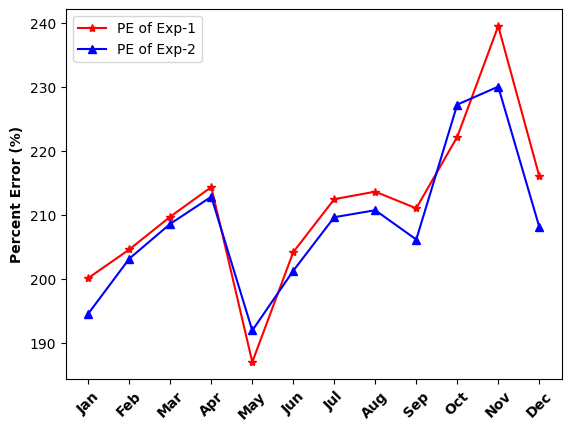

In [24]:
plt.style.use("default")
f = 2*(7.292e-5)*np.sin(np.deg2rad(lat))
# Interplated bathymetry is required to match the grid
# plot function is required to be chnaged to use an array of data 
H1 = h1.copy()
H2 = h2.copy()

def f_h(h,f):
    emp = np.zeros(h.shape[:])
    
    for i in range(70):
        for j in range(78):
            emp[i,j] = f[i]/h[i,j]
    return emp

f_h1 = f_h(h1,f)
f_h2 = f_h(h2,f)

data = np.array([f_h1,f_h1,f_h2])
#max_ = np.nanmean(data)/50
#data[data>max_] = max_

from scipy.stats import spearmanr
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

uv,data = prepareData(us,vs,data)
velexp1 = (u1**2+v1**2)**0.5
velexp1 = np.nan_to_num(velexp1)
velexp2 = (u2**2+v2**2)**0.5
velexp2 = np.nan_to_num(velexp2)

velglorys = (glorysu**2+glorysv**2)**0.5
velglorys = np.nan_to_num(velglorys)

f_h1 = f_h1*1e9
spc1= np.array([spearmanr(velexp1[i,:,:].flatten(),f_h1.flatten())[0] for i in range(12)])
spc2 = np.array([spearmanr(velexp2[i,:,:].flatten(),f_h2.flatten())[0] for i in range(12)])
spcGlorys = np.array([spearmanr(velglorys[i,:,:].flatten(),h1.flatten())[0] for i in range(12)])
pe1 = np.abs((spc1-spcGlorys)/spcGlorys)*100
pe2 =  np.abs((spc2-spcGlorys)/spcGlorys)*100
plt.plot(pe1, label = "PE of Exp-1", c = "red",marker="*")
plt.plot(pe2, label = "PE of Exp-2", c = "blue",marker="^")
#plt.plot(spcGlorys, label = "GLORYS", c = "k",marker="o")
plt.legend(loc = "best")
plt.ylabel("Percent Error (%)", fontweight = "bold")
plt.xticks(np.arange(12),months, fontweight="bold",rotation= 45)
plt.savefig("percent_error_correlation_between_velocity_with_f_by_h.jpg",dpi = 300)
plt.show()
# us,vs

# Fix the velocity lab

#plot2d(uv,data,vmx=max_,title = r'hhhh_$\frac{f}{H} (rads^{-1}m^{-1})$', adjust = 0.45, \
#       colormap = "nipy_spectral", scale = 30)


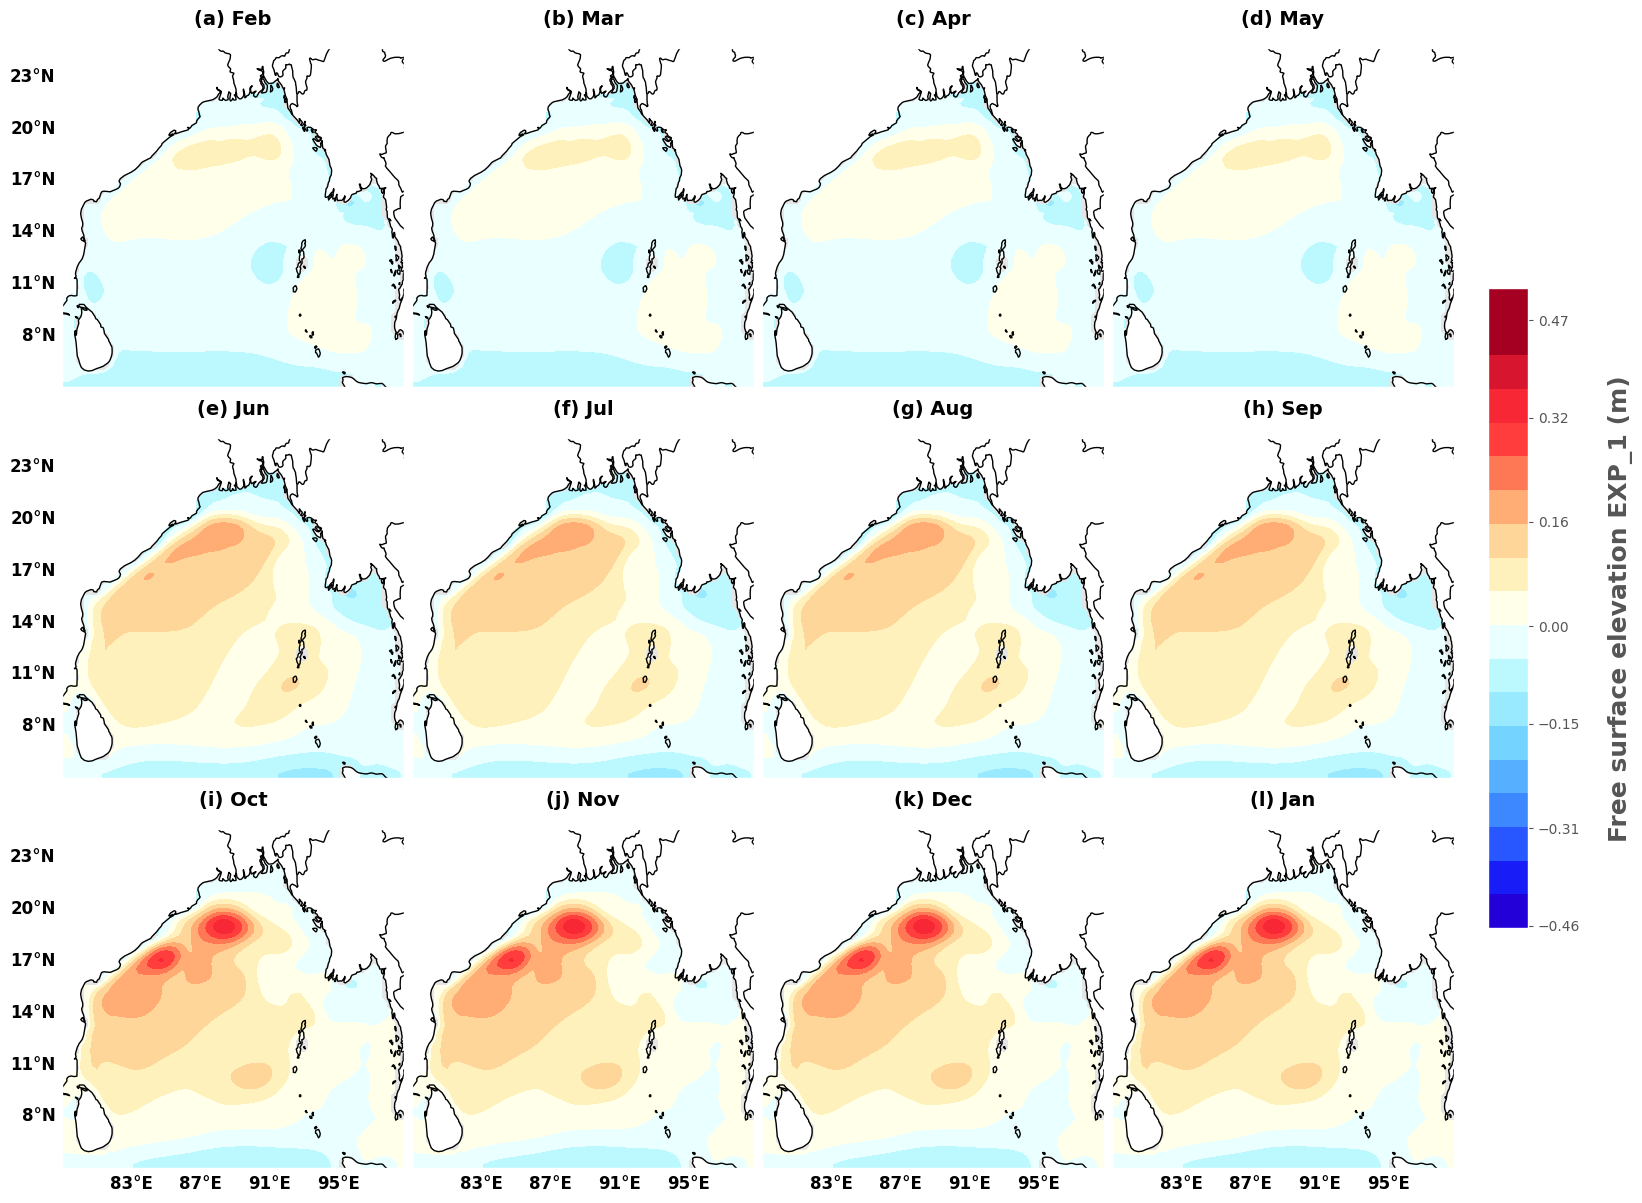

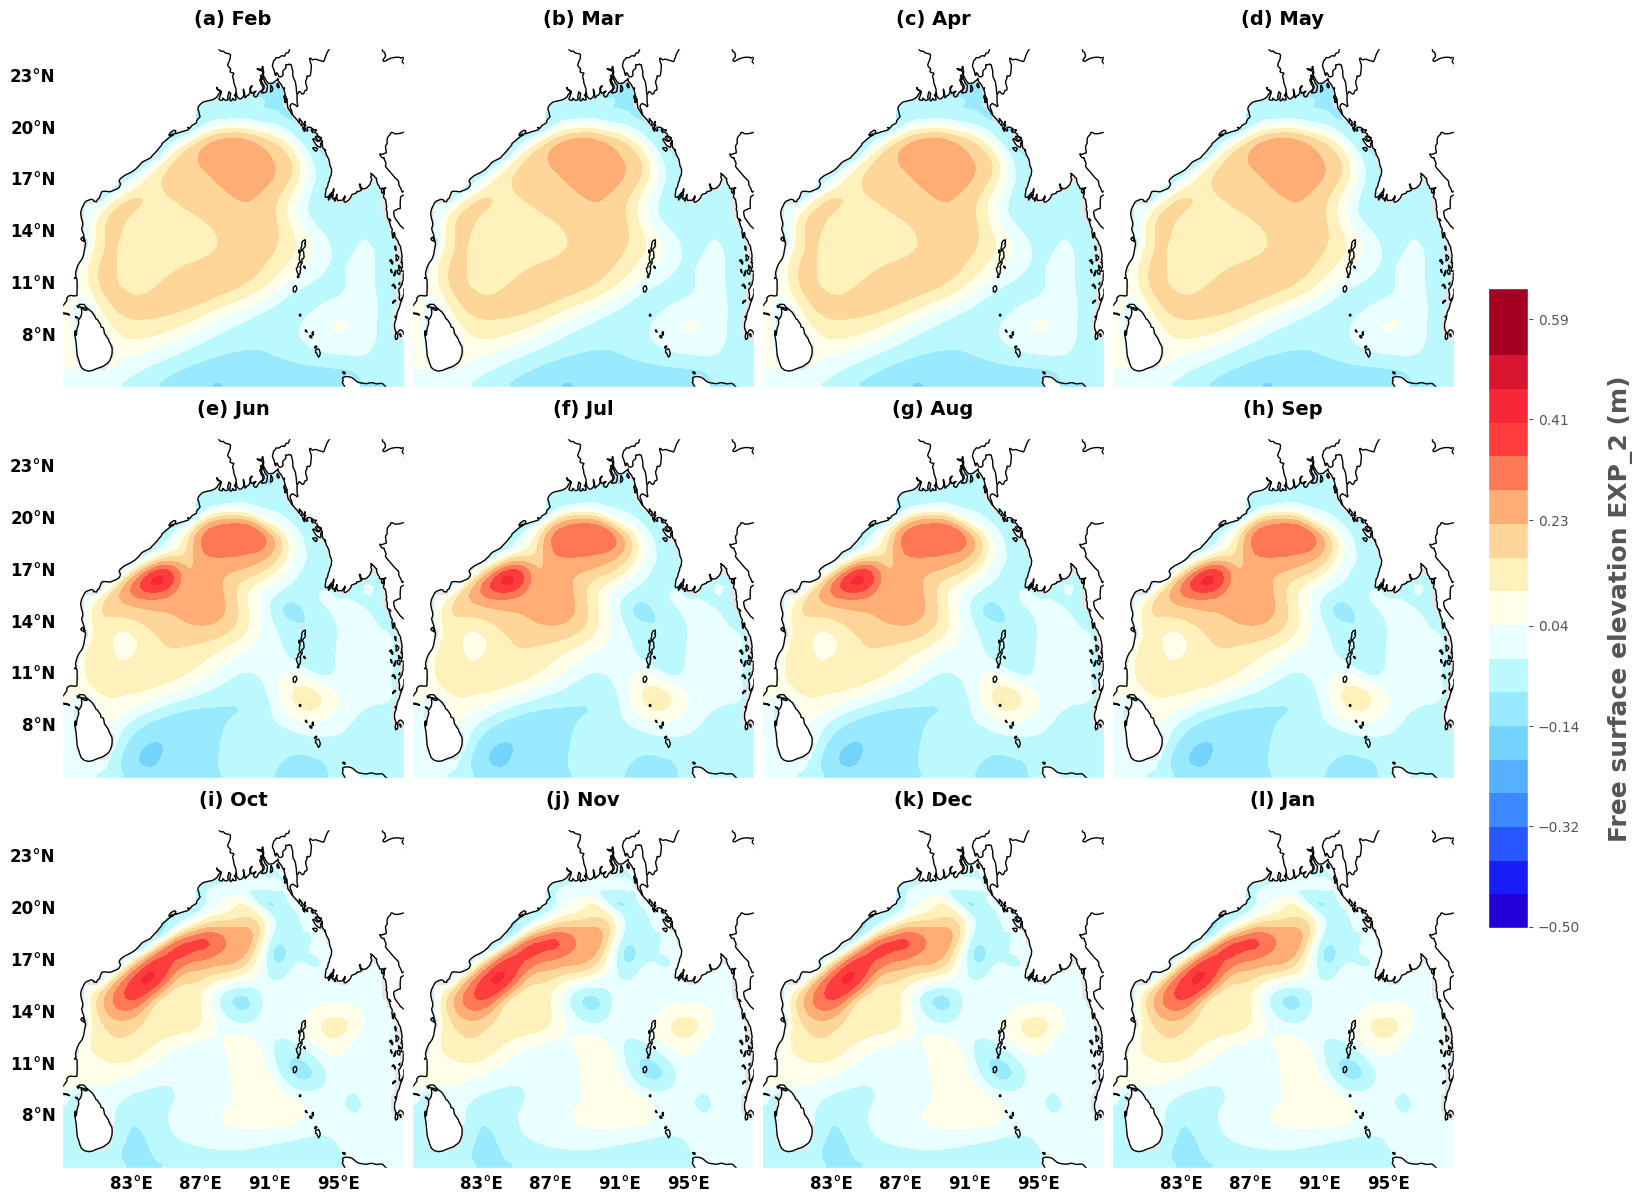

In [253]:
# elev1, elev2


# Reading grid data

# Experiment 1: Andaman Necobar is existed in the domain
# Experiment 2: Andaman Necobar is eleminated from the domain

output = "/kaggle/working/"
 
from matplotlib import gridspec

plt.style.use('ggplot')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

seq = ["("+i+")" for i in "abcdefghijkl"]
months = ["Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan"]

def plotElev(data, title,vmx=None, vmi = None, lon = lon, lat = lat, adjust = 0.6,\
               colormap = cmp, scale = 20):
  
  
  if not vmi:
      vmi = np.nanmin(data)
  if not vmx:
      vmx = np.nanmax(data)

  data[data>=vmx]=vmx
  #data[data<=vmi]=vmi

  if len(data.shape)==3:
      gap = (vmx-vmi)/6
  else:
      gap = np.round((vmx-vmi)/6,2)

  if len(data.shape)==3:
      clab = title
  else:
      clab = title.split("_")[1]
      
  extent = np.nanmin(lon), np.nanmax(lon), np.nanmin(lat), np.nanmax(lat)+2

  nrow = 3
  ncol = 4

  
  

  #eName
  fig = plt.figure(figsize=((ncol+1)*4, (nrow+1)*4))



  gs = gridspec.GridSpec(nrow, ncol,wspace=0,
                         hspace=0.15, top=1.-adjust/(nrow+1), 
                         bottom=adjust/(nrow+1), left=0.15, right=0.85)
  #gs = gridspec.GridSpec(nrow, ncol,wspace=0.0, hspace=0.0, top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), left=0.5/(ncol+1), right=1-0.5/(ncol+1))


  j = -1
  for i in range(nrow):
    for k in range(ncol):
      j+=1
      ax = plt.subplot(gs[i,k], projection=ccrs.PlateCarree())
      #ax.add_image(tile, 8)
      
    
      ax.set_extent([extent[0],extent[1],extent[2],extent[3]], ccrs.PlateCarree())


      ax.add_feature(cfeature.LAND, color = 'white')
      ax.add_feature(cfeature.COASTLINE, color = 'k', linewidth = 1)
      ax.add_feature(cfeature.BORDERS, color = 'k', linewidth = 1)
      #ax.add_feature(cfeature.RIVERS, color = "lightblue", linewidth = 0.5)
      

      #ax.set_xticks(np.arange(78,100,5))
      #ax.set_yticks([5,9, 13, 17, 21, 25])

      #ax.set_yticklabels([])
      #ax.set_xticklabels([])

      gl = ax.gridlines()
      gl.top_labels = False
      gl.xlines = False
      gl.ylines = False
      
      
    

      if j in [1,2,3,5,6,7]:
        
        gl.bottom_labels = False
        gl.left_labels = False
        
      elif j in [0,4]:
        
        gl.bottom_labels = False
        gl.left_labels = True
      elif j == 8:
        
        gl.bottom_labels = True
        gl.left_labels = True
      elif j in [9,10,11]:
        
        gl.bottom_labels = True
        gl.left_labels = False
        

          
      gl.xlocator = mticker.FixedLocator(np.arange(int(extent[0]),int(extent[1]),4))
      gl.ylocator = mticker.FixedLocator(np.arange(int(extent[2]),int(extent[3]),3))
        
      gl.xlabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
      gl.ylabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
    
     
     
          
      m = ax.contourf(lon, lat, data[i,:,:],cmap = colormap, 
                            transform = ccrs.PlateCarree(),extent = extent,
                            vmin = vmi, vmax = vmx,
                            levels = np.linspace(vmi, vmx+(vmx-vmi)/scale, scale))
     

     
      ax.text(sum(extent[:2])/2,26,"{}".format(seq[j]+" "+months[j]), 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 14)
      
      

  #plt.suptitle("{}".format(title), fontsize = 20, fontweight = "bold")
  cbar_ax = fig.add_axes([0.865, 0.3, 0.02, 0.4]) # [left,bottom,width,height]
  #cbar_ax = fig.add_axes([0.865, 0.37, 0.015, 0.25]) # [left,bottom,width,height]
  
  if not gap: pass  
  elif gap>=1:
        cb = fig.colorbar(m,  cax=cbar_ax,
                   ticks = [int(i) for i in np.arange(vmi,vmx+1,scale)])
        cb.set_label(clab, rotation = 90, fontweight = 'bold',
               fontsize = 14, labelpad = 20)
  else:
        cb = fig.colorbar(m,  cax=cbar_ax,
                   ticks = [round(i,2) for i in np.arange(vmi,vmx+gap,gap)])
        cb.set_label(clab, rotation = 90, fontweight = 'bold',
               fontsize = 18, labelpad = 20)
        

    
  
  plt.savefig(output+title.split("(")[0]+".jpg")
  plt.show()

plotElev(elev1, title= "Free surface elevation EXP_1 (m)",vmx=None, vmi = None, lon = lon_rho, lat = lat_rho, adjust = 0.6)
plotElev(elev2, title= "Free surface elevation EXP_2 (m)",vmx=None, vmi = None, lon = lon_rho, lat = lat_rho, adjust = 0.6)

In [25]:
# mean, std,Kullback leiblar divergence (3D), skillscore (3D), correlation

from scipy.special import kl_div
from scipy import stats

def gauss(data,mean,std):
    return (1/(std*(2*3.1416)**0.5))*2.71828183**(-0.5*((data-mean)/std)**2)

def skill(model,obj):
    avgObj = np.nanmean(obj,axis = 0)
    skill_ = np.zeros([model.shape[1],model.shape[2]])
    for i in range(model.shape[1]):
        for j in range(model.shape[2]):
            skill_[i,j] = np.nansum((model[:,i,j]-obj[:,i,j])**2,axis = 0)/np.nansum(\
                         [np.abs(model[k,i,j]-avgObj[i,j])+np.abs([obj[k,i,j]-avgObj[i,j]])\
                          for k in range(12)],axis = 0)
    return 1-skill_

def sensitivity(model, obj):
    meanobj = np.array([np.nanmean(obj[ii,:,:]) for ii in range(12)])
    meanmodel = np.array([np.nanmean(model[ii,:,:]) for ii in range(12)])
    
    stdobj = np.array([np.nanstd(obj[ii,:,:]) for ii in range(12)])
    stdmodel = np.array([np.nanstd(model[ii,:,:]) for ii in range(12)])
    
    pdfobj = np.array([gauss(obj[ii,:,:],meanobj[ii],stdobj[ii]) for ii in range(12)])
    pdfmodel = np.array([gauss(model[ii,:,:],meanmodel[ii],stdmodel[ii]) for ii in range(12)])
    klldv = np.array([kl_div(pdfmodel[ii,:,:],pdfobj[ii,:,:]) for ii in range(12)])

    skillscore = skill(model,obj)

    corr = np.array([np.nanmean(stats.spearmanr([model[ii,:,:].flatten(),obj[ii,:,:].flatten()])) \
        for ii in range(12)])

    return np.array([meanmodel,meanobj]),np.array([stdmodel,stdobj]),klldv,\
    skillscore, corr



In [26]:
models = [(u1**2+v1**2)**0.5,(u2**2+v2**2)**0.5]
objs = [(glorysu**2+glorysv**2)**0.5,(glorysu**2+glorysv**2)**0.5]

sensitivityuv =  [sensitivity(models[l],objs[l]) for l in range(2)]
[i.shape for i in sensitivityuv[0]]

[(2, 12), (2, 12), (12, 70, 78), (70, 78), (12,)]

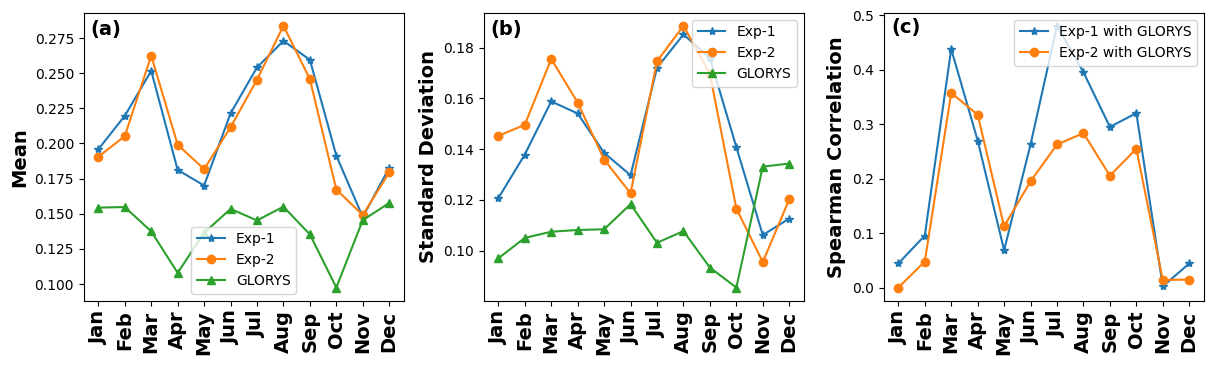

In [37]:

velSen1,velSen2 = sensitivityuv[0],sensitivityuv[1]
data = [[velSen1[0][0],velSen2[0][0],velSen1[0][1]],\
        [velSen1[1][0],velSen2[1][0],velSen1[1][1]],[velSen1[-1],velSen2[-1]]]
#Mean,STD, Corr
label = [["Exp-1","Exp-2","GLORYS"],["Exp-1","Exp-2","GLORYS"],\
         ["Exp-1 with GLORYS","Exp-2 with GLORYS"]]
ylabel = ["Mean", "Standard Deviation","Spearman Correlation"]
        
output = "/kaggle/working/"

plt.style.use('default')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

seq = ["("+i+")" for i in "abc"]
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
from matplotlib import gridspec

def rowLinePlot(data, label, ylabel, loc_,title,tx,adjust = 0.6,wspace_=0.2):
  
  nrow = 1
  ncol = 3


  #eName
  fig = plt.figure(figsize=((ncol+1)*4, (nrow+1)*4))

  gs = gridspec.GridSpec(nrow, ncol,wspace=wspace_,
                         hspace=0.15, top=1.-adjust/(nrow+1), 
                         bottom=adjust/(nrow+1), left=0.15, right=0.85)
  #gs = gridspec.GridSpec(nrow, ncol,wspace=0.0, hspace=0.0, top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), left=0.5/(ncol+1), right=1-0.5/(ncol+1))
  months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

  j = -1
  for i in range(nrow):
    for k in range(ncol):
      j+=1
      ax = plt.subplot(gs[i,k])
      y = np.arange(0,len(data[j][0]))
      ax.plot(y,data[j][0], label = label[j][0], marker = "*")
      ax.plot(y,data[j][1], label = label[j][1], marker = "o")
      if len(data[j])==3:
          ax.plot(y,data[j][2], label = label[j][2], marker = "^")
      ax.set_ylabel(ylabel[j], fontsize = 14, fontweight = "bold")
      ax.set_xticks(y,months,rotation=90,fontsize = 14, fontweight = "bold")

      ax.legend(loc = loc_[j], facecolor = "w")
      ax.text(tx[j][0],tx[j][1],"{}".format(seq[j]), 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 14)
      
    
  plt.savefig(output+title.split("(")[0]+".jpg",dpi = 300)
  plt.show()

loc_ = ["best","upper right","best"]
tx = [[0.3,0.277],[0.3,0.185],[0.3,0.467]]
rowLinePlot(data, label, ylabel, loc_ = loc_,title="Mean_std_corr_UV",tx = tx,adjust=0.64,wspace_=0.25)

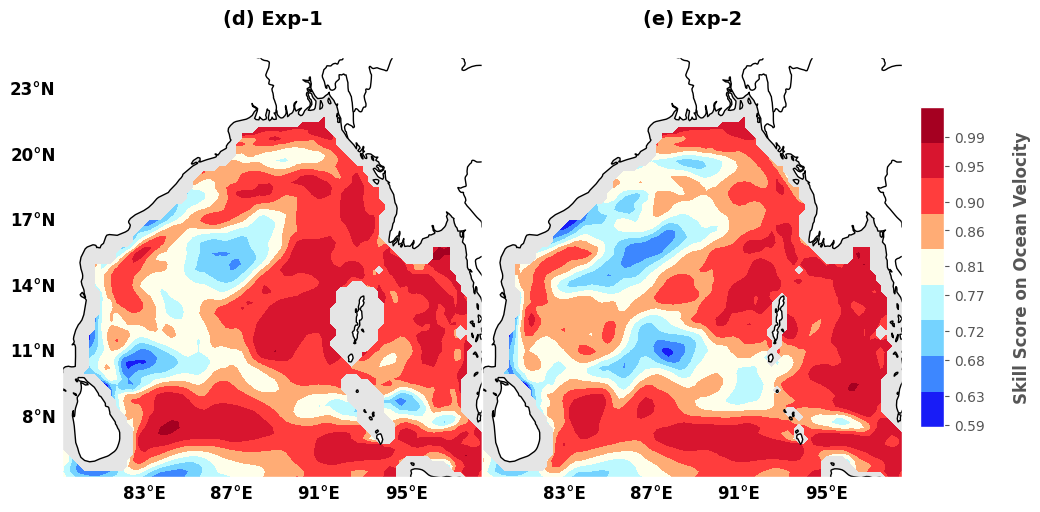

In [40]:
output = "/kaggle/working/"
 
from matplotlib import gridspec

plt.style.use('ggplot')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

seq = ["("+i+")" for i in "de"]
seq2 = ["Exp-1","Exp-2"]

data = np.array([velSen1[3],velSen2[3]])

def plot2DValidation(data, title,vmx=None, vmi = None,lon = lon, lat = lat, adjust = 0.6,\
               colormap = cmp, scale = 20):
  
  
  if not vmi:
      vmi = np.nanmin(data)
  if not vmx:
      vmx = np.nanmax(data)
  
  clab = title
      
  extent = np.nanmin(lon), np.nanmax(lon), np.nanmin(lat), np.nanmax(lat)+2

  nrow = 1
  ncol = 2
  
  #eName
  fig = plt.figure(figsize=((ncol+1)*4, (nrow+1)*4))

  gs = gridspec.GridSpec(nrow, ncol,wspace=0,
                         hspace=0.15, top=1.-adjust/(nrow+1), 
                         bottom=adjust/(nrow+1), left=0.15, right=0.85)

  j = -1
  for i in range(nrow):
    for k in range(ncol):
      j+=1
      ax = plt.subplot(gs[i,k], projection=ccrs.PlateCarree())
      
        
      ax.set_extent([extent[0],extent[1],extent[2],extent[3]], ccrs.PlateCarree())

      ax.add_feature(cfeature.LAND, color = 'white')
      ax.add_feature(cfeature.COASTLINE, color = 'k', linewidth = 1)
      ax.add_feature(cfeature.BORDERS, color = 'k', linewidth = 1)

      gl = ax.gridlines()
      gl.top_labels = False
      gl.xlines = False
      gl.ylines = False

      if j ==0:
        
        gl.bottom_labels = True
        gl.left_labels = True
        
      elif j==1:
        
        gl.bottom_labels = True
        gl.left_labels = False
        
      gl.xlocator = mticker.FixedLocator(np.arange(int(extent[0]),int(extent[1]),4))
      gl.ylocator = mticker.FixedLocator(np.arange(int(extent[2]),int(extent[3]),3))
        
      gl.xlabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
      gl.ylabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
    
      data[j,:,:][data[j,:,:]>=vmx]=vmx
      data[j,:,:][data[j,:,:]<=vmi]=vmi
      m = ax.contourf(lon, lat, data[j,:,:],cmap = colormap, 
                            transform = ccrs.PlateCarree(),extent = extent,
                            vmin = vmi, vmax = vmx,
                            levels = np.linspace(vmi, vmx+(vmx-vmi)/scale, scale))
     
 
      ax.text(sum(extent[:2])/2,26,"{}".format(seq[j]+" "+seq2[j]), 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 14)
      
      

  #plt.suptitle("{}".format(title), fontsize = 20, fontweight = "bold")
  cbar_ax = fig.add_axes([0.865, 0.3, 0.02, 0.4]) # [left,bottom,width,height]
  #cbar_ax = fig.add_axes([0.865, 0.37, 0.015, 0.25]) # [left,bottom,width,height]
  
  cb = fig.colorbar(m,  cax=cbar_ax,
                   ticks = [round(i,2) for i in np.linspace(vmi,vmx,scale)])
  cb.set_label(clab, rotation = 90, fontweight = 'bold',
               fontsize = 12, labelpad = 20)
  
  plt.savefig(output+title+".jpg", dpi = 300)
  plt.show()

# Plot skill score
plot2DValidation(data, title= "Skill Score on Ocean Velocity",adjust = 0.45, scale = 10)

# Plot KL-divergence

data = np.array([np.nanmean(velSen1[2],axis = 0),np.nanmean(velSen2[2],axis = 0)])
seq = ["("+i+")" for i in "fg"]
plot2DValidation(data, title= "Kullback–Leibler Divergence on Ocean Velocity",vmx = 2,adjust = 0.45, scale = 10)


In [41]:
# mean, std,Kullback leiblar divergence (3D), skillscore (3D), correlation

from scipy.special import kl_div
from scipy import stats

def gauss(data,mean,std):
    return (1/(std*(2*3.1416)**0.5))*2.71828183**(-0.5*((data-mean)/std)**2)

def skill(model,obj):
    avgObj = np.nanmean(obj[1:,:,:],axis = 0)
    skill_ = np.zeros([model.shape[1],model.shape[2]])
    for i in range(model.shape[1]):
        for j in range(model.shape[2]):
            skill_[i,j] = np.nansum((model[:,i,j]-obj[:,i,j])**2,axis = 0)/np.nansum(\
                         [np.abs(model[k,i,j]-avgObj[i,j])+np.abs([obj[k,i,j]-avgObj[i,j]])\
                          for k in range(12)],axis = 0)
    return 1-skill_

def sensitivity(model, obj1, obj2):
    meanobj1 = np.array([np.nanmean(obj1[i,:,:]) for i in range(12)])
    meanobj2 = np.array([np.nanmean(obj2[i,:,:]) for i in range(12)])
    meanmodel = np.array([np.nanmean(model[i,:,:]) for i in range(12)])
    
    stdobj1 = np.array([np.nanstd(obj1[i,:,:]) for i in range(12)])
    stdobj2 = np.array([np.nanstd(obj2[i,:,:]) for i in range(12)])
    stdmodel = np.array([np.nanstd(model[i,:,:]) for i in range(12)])
    
    pdfobj1 = np.array([gauss(obj1[i,:,:],meanobj1[i],stdobj1[i]) for i in range(12)])
    pdfobj2 = np.array([gauss(obj2[i,:,:],meanobj2[i],stdobj2[i]) for i in range(12)])
    pdfmodel = np.array([gauss(model[i,:,:],meanmodel[i],stdmodel[i]) for i in range(12)])
    klldv1 = np.array([kl_div(pdfmodel[i,:,:],pdfobj1[i,:,:]) for i in range(12)])
    klldv2 = np.array([kl_div(pdfmodel[i,:,:],pdfobj2[i,:,:]) for i in range(12)])

    skillscore1 = skill(model,obj1)
    skillscore2 = skill(model,obj2)

    corr1 = np.array([np.nanmean(stats.spearmanr([model[i,:,:].flatten(),obj1[i,:,:].flatten()])) \
        for i in range(12)])
    corr2 = np.array([np.nanmean(stats.spearmanr([model[i,:,:].flatten(),obj2[i,:,:].flatten()])) \
        for i in range(12)])

    return np.array([meanobj1,meanobj2,meanmodel]),np.array([stdobj1,stdobj2,stdmodel]),\
    np.array([klldv1,klldv2]),np.array([skillscore1,skillscore2]), np.array([corr1,corr2])


models = [s1,s2]
obj1 = [glorysSSS,glorysSSS]
obj2 = [smap_smos_insitu_SSS,smap_smos_insitu_SSS]

senSSS =  [sensitivity(models[ii],obj1[ii],obj2[ii]) for ii in range(2)]

[[j.shape for j in i] for i in senSSS]

[[(3, 12), (3, 12), (2, 12, 70, 78), (2, 70, 78), (2, 12)],
 [(3, 12), (3, 12), (2, 12, 70, 78), (2, 70, 78), (2, 12)]]

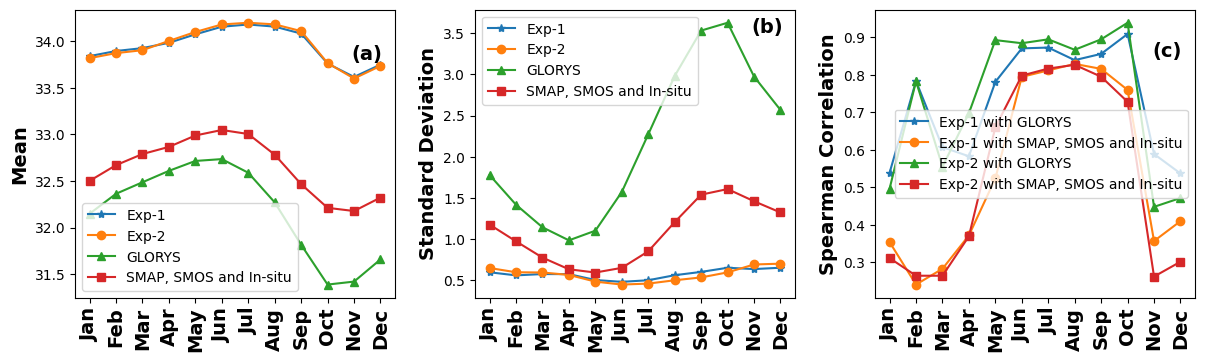

In [42]:

sssSen1,sssSen2 = senSSS[0],senSSS[1]

# [0,1,2] = ['GLORYS','SMAP, SMOS and In-situ',"Simulation"]
data = [[sssSen1[0][2],sssSen2[0][2],sssSen1[0][0],sssSen1[0][1]],\
        [sssSen1[1][2],sssSen2[1][2],sssSen1[1][0],sssSen1[1][1]],\
        [sssSen1[-1][0],sssSen1[-1][1],sssSen2[-1][0],sssSen2[-1][1]]]
#Mean,STD, Corr
label = [["Exp-1","Exp-2","GLORYS","SMAP, SMOS and In-situ"],\
         ["Exp-1","Exp-2","GLORYS","SMAP, SMOS and In-situ"],\
         ["Exp-1 with GLORYS","Exp-1 with SMAP, SMOS and In-situ","Exp-2 with GLORYS",\
         "Exp-2 with SMAP, SMOS and In-situ"]]
ylabel = ["Mean", "Standard Deviation","Spearman Correlation"]
        
output = "/kaggle/working/"

plt.style.use('default')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

seq = ["("+i+")" for i in "abc"]
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
from matplotlib import gridspec

def rowLinePlot(data, label, ylabel, loc_,title,tx,adjust = 0.6,wspace_=0.2):
  
  nrow = 1
  ncol = 3


  #eName
  fig = plt.figure(figsize=((ncol+1)*4, (nrow+1)*4))

  gs = gridspec.GridSpec(nrow, ncol,wspace=wspace_,
                         hspace=0.15, top=1.-adjust/(nrow+1), 
                         bottom=adjust/(nrow+1), left=0.15, right=0.85)
  #gs = gridspec.GridSpec(nrow, ncol,wspace=0.0, hspace=0.0, top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), left=0.5/(ncol+1), right=1-0.5/(ncol+1))
  months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

  j = -1
  for i in range(nrow):
    for k in range(ncol):
      j+=1
      ax = plt.subplot(gs[i,k])
      y = np.arange(0,len(data[j][0]))
      ax.plot(y,data[j][0], label = label[j][0], marker = "*")
      ax.plot(y,data[j][1], label = label[j][1], marker = "o")
      ax.plot(y,data[j][2], label = label[j][2], marker = "^")
      ax.plot(y,data[j][3], label = label[j][3], marker = "s")
      ax.set_ylabel(ylabel[j], fontsize = 14, fontweight = "bold")
      ax.set_xticks(y,months,rotation=90,fontsize = 14, fontweight = "bold")

      ax.legend(loc = loc_[j], facecolor = "w")
      ax.text(tx[j][0],tx[j][1],"{}".format(seq[j]), 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 14)
      
    
  plt.savefig(output+title.split("(")[0]+".jpg",dpi=300)
  plt.show()

loc_ = ["best","best","best"]
tx = [[10.5,33.8],[10.5,3.5],[10.5,0.85]]
rowLinePlot(data, label, ylabel, loc_ = loc_,title="Mean_std_corr_SSS",tx = tx,adjust=0.64,wspace_=0.25)

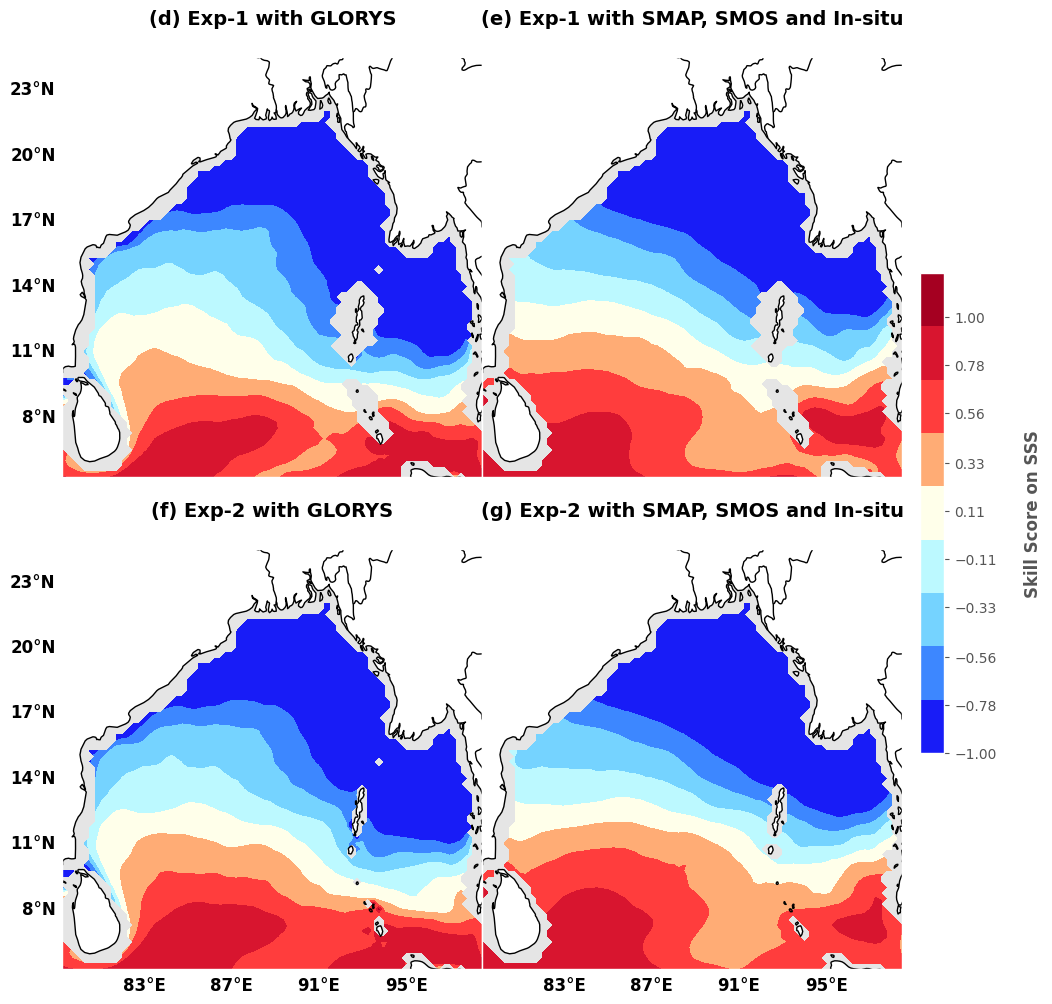

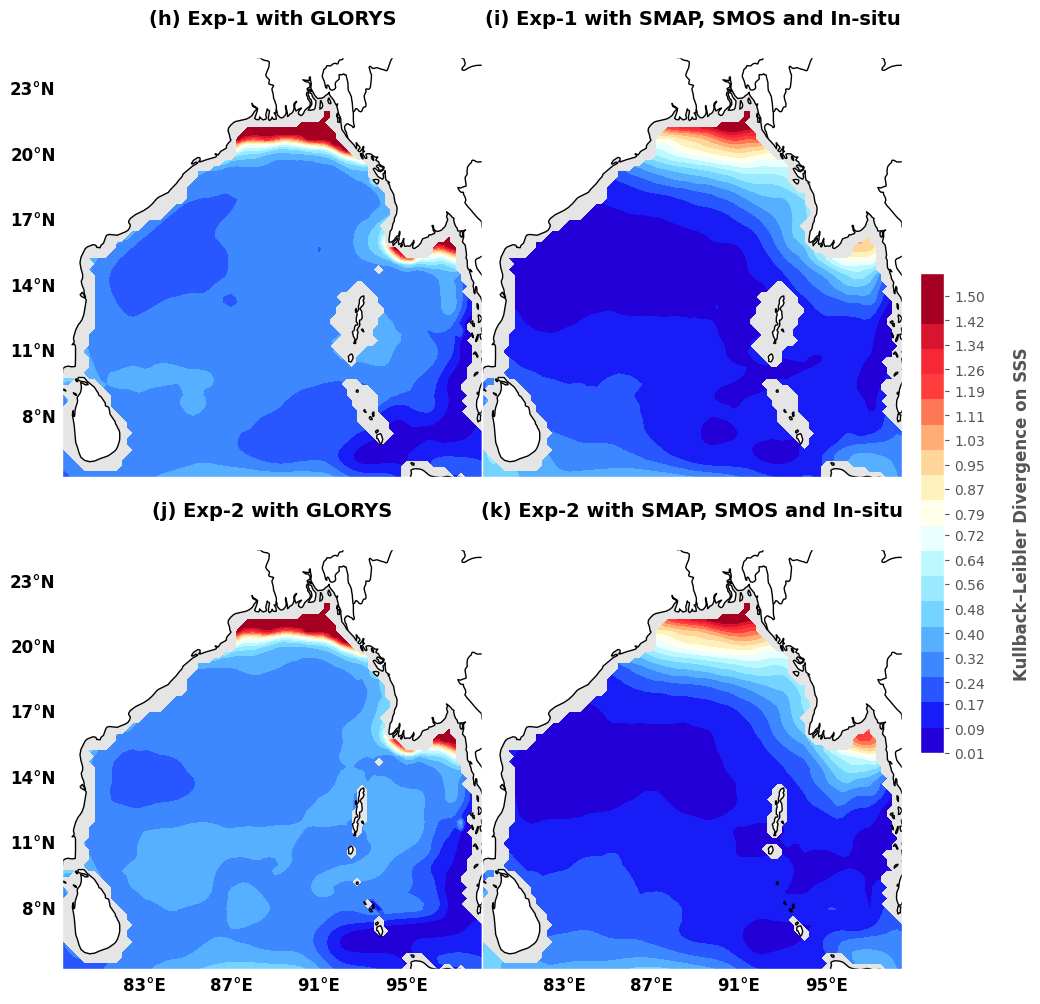

In [50]:
output = "/kaggle/working/"
 
from matplotlib import gridspec

plt.style.use('ggplot')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

seq = ["("+i+")" for i in "defg"]
seq2 = ["Exp-1 with GLORYS","Exp-1 with SMAP, SMOS and In-situ",\
        "Exp-2 with GLORYS","Exp-2 with SMAP, SMOS and In-situ"]

data = np.array([sssSen1[3][0],sssSen1[3][1],sssSen2[3][0],sssSen2[3][1]])

def plot2DValidation(data, title,vmx=9999, vmi = 9999,lon = lon, lat = lat, adjust = 0.6,\
               hspace_ =0.2,colormap = cmp, scale = 20):
  
  
  if vmi==9999:
      vmi = np.nanmin(data)
  if vmx==9999:
      vmx = np.nanmax(data)
  
  clab = title
      
  extent = np.nanmin(lon), np.nanmax(lon), np.nanmin(lat), np.nanmax(lat)+2

  nrow = 2
  ncol = 2
  
  #eName
  fig = plt.figure(figsize=((ncol+1)*4, (nrow+1)*4))

  gs = gridspec.GridSpec(nrow, ncol,wspace=0,
                         hspace=hspace_, top=1.-adjust/(nrow+1), 
                         bottom=adjust/(nrow+1), left=0.15, right=0.85)

  j = -1
  for i in range(nrow):
    for k in range(ncol):
      j+=1
      ax = plt.subplot(gs[i,k], projection=ccrs.PlateCarree())
      
        
      ax.set_extent([extent[0],extent[1],extent[2],extent[3]], ccrs.PlateCarree())

      ax.add_feature(cfeature.LAND, color = 'white')
      ax.add_feature(cfeature.COASTLINE, color = 'k', linewidth = 1)
      ax.add_feature(cfeature.BORDERS, color = 'k', linewidth = 1)

      gl = ax.gridlines()
      gl.top_labels = False
      gl.xlines = False
      gl.ylines = False

      if j ==0:
        
        gl.bottom_labels = False
        gl.left_labels = True
        
      elif j==1:
        
        gl.bottom_labels = False
        gl.left_labels = False
      elif j==2:
        
        gl.bottom_labels = True
        gl.left_labels = True
      elif j==3:
        
        gl.bottom_labels = True
        gl.left_labels = False
        
      gl.xlocator = mticker.FixedLocator(np.arange(int(extent[0]),int(extent[1]),4))
      gl.ylocator = mticker.FixedLocator(np.arange(int(extent[2]),int(extent[3]),3))
        
      gl.xlabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
      gl.ylabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
    
      data[j,:,:][data[j,:,:]>=vmx]=vmx
      data[j,:,:][data[j,:,:]<=vmi]=vmi
      m = ax.contourf(lon, lat, data[j,:,:],cmap = colormap, 
                            transform = ccrs.PlateCarree(),extent = extent,
                            vmin = vmi, vmax = vmx,
                            levels = np.linspace(vmi, vmx+(vmx-vmi)/scale, scale))
     
 
      ax.text(sum(extent[:2])/2,26,"{}".format(seq[j]+" "+seq2[j]), 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 14)
      
      

  #plt.suptitle("{}".format(title), fontsize = 20, fontweight = "bold")
  cbar_ax = fig.add_axes([0.865, 0.3, 0.02, 0.4]) # [left,bottom,width,height]
  #cbar_ax = fig.add_axes([0.865, 0.37, 0.015, 0.25]) # [left,bottom,width,height]
  
  cb = fig.colorbar(m,  cax=cbar_ax,
                   ticks = [round(i,2) for i in np.linspace(vmi,vmx,scale)])
  cb.set_label(clab, rotation = 90, fontweight = 'bold',
               fontsize = 12, labelpad = 20)
  
  plt.savefig(output+title+".jpg", dpi = 300)
  plt.show()

# Plot skill score
plot2DValidation(data, title= "Skill Score on SSS",vmx = 1,vmi = -1,adjust = 0.35, \
                 hspace_=0.15,scale = 10)

# Plot KL-divergence

data = np.array([np.nanmean(sssSen1[2][0],axis = 0),np.nanmean(sssSen1[2][1],axis = 0),\
                 np.nanmean(sssSen2[2][0],axis = 0),np.nanmean(sssSen2[2][1],axis = 0)])
seq = ["("+i+")" for i in "hijk"]
plot2DValidation(data, title= "Kullback–Leibler Divergence on SSS",vmx = 1.5,adjust = 0.35,hspace_=0.15,scale = 20)


In [44]:
# Evalaution of SST

models = [t1,t2]
obj1 = [glorysSST,glorysSST]
obj2 = [avhrr_pathfinder_SST,avhrr_pathfinder_SST]

senSST =  [sensitivity(models[ii],obj1[ii],obj2[ii]) for ii in range(2)]

[[j.shape for j in i] for i in senSST]

[[(3, 12), (3, 12), (2, 12, 70, 78), (2, 70, 78), (2, 12)],
 [(3, 12), (3, 12), (2, 12, 70, 78), (2, 70, 78), (2, 12)]]

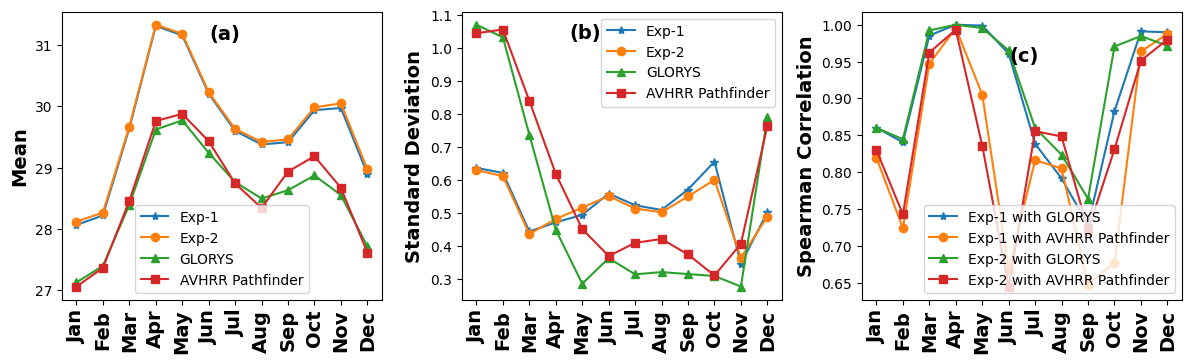

In [45]:

sstSen1,sstSen2 = senSST[0],senSST[1]

# [0,1,2] = ['GLORYS','SMAP, SMOS and In-situ',"Simulation"]
data = [[sstSen1[0][2],sstSen2[0][2],sstSen1[0][0],sstSen1[0][1]],\
        [sstSen1[1][2],sstSen2[1][2],sstSen1[1][0],sstSen1[1][1]],\
        [sstSen1[-1][0],sstSen1[-1][1],sstSen2[-1][0],sstSen2[-1][1]]]
#Mean,STD, Corr
label = [["Exp-1","Exp-2","GLORYS","AVHRR Pathfinder"],\
         ["Exp-1","Exp-2","GLORYS","AVHRR Pathfinder"],\
         ["Exp-1 with GLORYS","Exp-1 with AVHRR Pathfinder","Exp-2 with GLORYS",\
         "Exp-2 with AVHRR Pathfinder"]]
ylabel = ["Mean", "Standard Deviation","Spearman Correlation"]
        
output = "/kaggle/working/"

plt.style.use('default')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

seq = ["("+i+")" for i in "abc"]
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
from matplotlib import gridspec

def rowLinePlot(data, label, ylabel, loc_,title,tx,adjust = 0.6,wspace_=0.2):
  
  nrow = 1
  ncol = 3


  #eName
  fig = plt.figure(figsize=((ncol+1)*4, (nrow+1)*4))
  gs = gridspec.GridSpec(nrow, ncol,wspace=wspace_,
                         hspace=0.15, top=1.-adjust/(nrow+1), 
                         bottom=adjust/(nrow+1), left=0.15, right=0.85)
  months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
  j = -1
  for i in range(nrow):
    for k in range(ncol):
      j+=1
      ax = plt.subplot(gs[i,k])
      y = np.arange(0,len(data[j][0]))
      ax.plot(y,data[j][0], label = label[j][0], marker = "*")
      ax.plot(y,data[j][1], label = label[j][1], marker = "o")
      ax.plot(y,data[j][2], label = label[j][2], marker = "^")
      ax.plot(y,data[j][3], label = label[j][3], marker = "s")
      ax.set_ylabel(ylabel[j], fontsize = 14, fontweight = "bold")
      ax.set_xticks(y,months,rotation=90,fontsize = 14, fontweight = "bold")

      ax.legend(loc = loc_[j], facecolor = "w")
      ax.text(tx[j][0],tx[j][1],"{}".format(seq[j]), 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 14)
       
  plt.savefig(output+title+".jpg",dpi=300)
  plt.show()

loc_ = ["best","best","best"]
tx = [[5.6,31.1],[4.1,1.03],[5.6,0.95]]
rowLinePlot(data, label, ylabel, loc_ = loc_,title="Mean_std_corr_SST",tx = tx,adjust=0.64,wspace_=0.25)

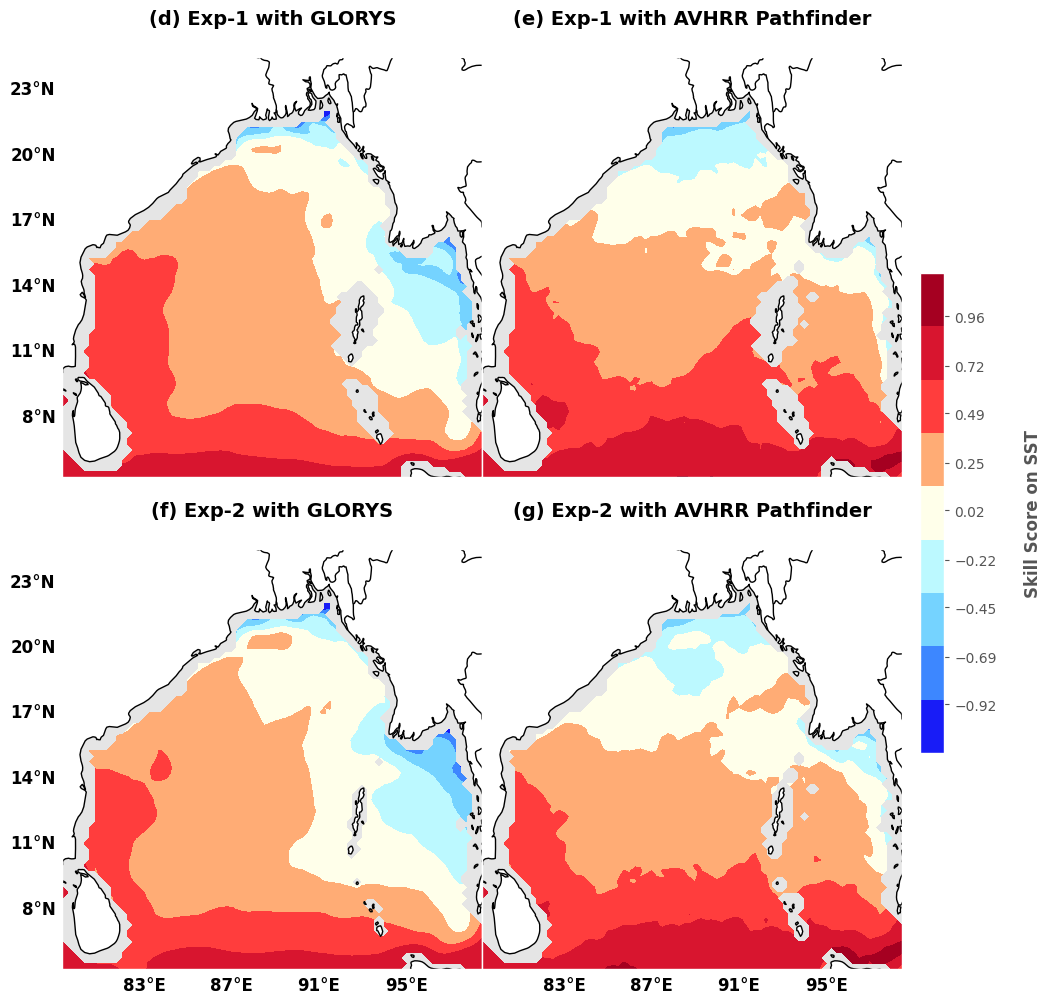

In [53]:
output = "/kaggle/working/"
 
from matplotlib import gridspec

plt.style.use('ggplot')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

seq = ["("+i+")" for i in "defg"]
seq2 = ["Exp-1 with GLORYS","Exp-1 with AVHRR Pathfinder",\
        "Exp-2 with GLORYS","Exp-2 with AVHRR Pathfinder"]

data = np.array([sstSen1[3][0],sstSen1[3][1],sstSen2[3][0],sstSen2[3][1]])

def plot2DValidation(data, title,vmx=9999, vmi = 9999,lon = lon, lat = lat, adjust = 0.6,\
               hspace_ =0.2,colormap = cmp, scale = 20):
  
  
  if vmi==9999:
      vmi = np.nanmin(data)
  if vmx==9999:
      vmx = np.nanmax(data)
  
  clab = title
      
  extent = np.nanmin(lon), np.nanmax(lon), np.nanmin(lat), np.nanmax(lat)+2

  nrow = 2
  ncol = 2
  
  #eName
  fig = plt.figure(figsize=((ncol+1)*4, (nrow+1)*4))

  gs = gridspec.GridSpec(nrow, ncol,wspace=0,
                         hspace=hspace_, top=1.-adjust/(nrow+1), 
                         bottom=adjust/(nrow+1), left=0.15, right=0.85)

  j = -1
  for i in range(nrow):
    for k in range(ncol):
      j+=1
      ax = plt.subplot(gs[i,k], projection=ccrs.PlateCarree())
      
        
      ax.set_extent([extent[0],extent[1],extent[2],extent[3]], ccrs.PlateCarree())

      ax.add_feature(cfeature.LAND, color = 'white')
      ax.add_feature(cfeature.COASTLINE, color = 'k', linewidth = 1)
      ax.add_feature(cfeature.BORDERS, color = 'k', linewidth = 1)

      gl = ax.gridlines()
      gl.top_labels = False
      gl.xlines = False
      gl.ylines = False

      if j ==0:
        
        gl.bottom_labels = False
        gl.left_labels = True
        
      elif j==1:
        
        gl.bottom_labels = False
        gl.left_labels = False
      elif j==2:
        
        gl.bottom_labels = True
        gl.left_labels = True
      elif j==3:
        
        gl.bottom_labels = True
        gl.left_labels = False
        
      gl.xlocator = mticker.FixedLocator(np.arange(int(extent[0]),int(extent[1]),4))
      gl.ylocator = mticker.FixedLocator(np.arange(int(extent[2]),int(extent[3]),3))
        
      gl.xlabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
      gl.ylabel_style = {'size': 12, 'color': 'k', 'fontweight':'bold'}
    
      data[j,:,:][data[j,:,:]>=vmx]=vmx
      data[j,:,:][data[j,:,:]<=vmi]=vmi
      m = ax.contourf(lon, lat, data[j,:,:],cmap = colormap, 
                            transform = ccrs.PlateCarree(),extent = extent,
                            vmin = vmi, vmax = vmx,
                            levels = np.linspace(vmi, vmx+(vmx-vmi)/scale, scale))
     
 
      ax.text(sum(extent[:2])/2,26,"{}".format(seq[j]+" "+seq2[j]), 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 14)
      
      

  #plt.suptitle("{}".format(title), fontsize = 20, fontweight = "bold")
  cbar_ax = fig.add_axes([0.865, 0.3, 0.02, 0.4]) # [left,bottom,width,height]
  #cbar_ax = fig.add_axes([0.865, 0.37, 0.015, 0.25]) # [left,bottom,width,height]
  
  cb = fig.colorbar(m,  cax=cbar_ax,
                   ticks = [round(i,2) for i in np.linspace(vmi,vmx,scale)])
  cb.set_label(clab, rotation = 90, fontweight = 'bold',
               fontsize = 12, labelpad = 20)
  
  plt.savefig(output+title+".jpg", dpi = 300)
  plt.show()

# Plot skill score
plot2DValidation(data, title= "Skill Score on SST",adjust = 0.35, \
                 hspace_=0.15,scale = 10)

# Plot KL-divergence

data = np.array([np.nanmean(sstSen1[2][0],axis = 0),np.nanmean(sstSen1[2][1],axis = 0),\
                 np.nanmean(sstSen2[2][0],axis = 0),np.nanmean(sstSen2[2][1],axis = 0)])
seq = ["("+i+")" for i in "hijk"]
plot2DValidation(data, title= "Kullback–Leibler Divergence on SST",vmx = 0.8,adjust = 0.35,hspace_=0.15,scale = 20)


In [47]:
# Andaman and Necobar existed
path1 = "/kaggle/input/updated-simulations/croco_avg/croco_avg_Andaman_Necobar_ON.nc" 

# Andaman and Necobar eliminated
path2 = "/kaggle/input/updated-simulations/croco_avg/croco_avg_Andaman_Necobar_off.nc"


exdt1 = xr.open_dataset(path1)
exdt2 = xr.open_dataset(path2)

def calDepth(ds):
    Zo_rho = (ds.hc * ds.s_rho + ds.Cs_rho * ds.h) / (ds.hc + ds.h)
    depth = ds.zeta + (ds.zeta + ds.h) * Zo_rho
    return depth
    
depthex1 = calDepth(exdt1)
depthex2 = calDepth(exdt2)

depthex1[1:13,:,:,:].shape,depthex2[1:13,:,:,:].shape

((12, 75, 81, 64), (12, 75, 81, 64))

In [294]:
!pip install seawater
!pip install gsw

In [295]:
# create time data frame
from seawater import eos80 as sw
import gsw

def flattenTracers(s1,t1,d1,s2,t2,d2):

    # s = salinity, d = depth, t = temperature
    s1l = np.hstack([np.hstack([ii for ii in s1[d_,:,:]]) for d_ in range(64)])
    t1l = np.hstack([np.hstack([ii for ii in t1[d_,:,:]]) for d_ in range(64)])
    s2l = np.hstack([np.hstack([ii for ii in s2[d_,:,:]]) for d_ in range(64)])
    t2l = np.hstack([np.hstack([ii for ii in t2[d_,:,:]]) for d_ in range(64)])
    d1l = np.hstack([np.hstack([ii for ii in d1[:,:,d_]]) for d_ in range(64)])
    d2l = np.hstack([np.hstack([ii for ii in d2[:,:,d_]]) for d_ in range(64)])
       
    return s1l,t1l,d1l,s2l,t2l,d2l

def createDF(s1,t1,d1,s2,t2,d2,lat,lon):
    s1l,t1l,d1l,s2l,t2l,d2l  = flattenTracers(s1,t1,d1,s2,t2,d2) 

    pres1 = np.abs(sw.pres(d1l,lat))
    pres2 = np.abs(sw.pres(d2l,lat))

    # Absolute salinity
    sa1 = gsw.conversions.SA_from_SP(s1l, pres1, lon, lat)
    sa2 = gsw.conversions.SA_from_SP(s2l, pres2, lon, lat)

    # Conservative temperature
    ct1 = gsw.conversions.CT_from_t(sa1, t1l, pres1)
    ct2 = gsw.conversions.CT_from_t(sa2, t2l, pres2)

    # Stability: Brunt-Vaisala frequency: N^2
    # Calculate this after creating the data
    #n1 = gsw.stability.Nsquared(sa1, ct1, pres1)
    #n2 = gsw.stability.Nsquared(sa2, ct2, pres2)
   

    # Density: Ratio of the thermal expansion coefficient to the saline contraction coefficient
    ab1 = gsw.density.alpha_on_beta(sa1, ct1, pres1)
    ab2 = gsw.density.alpha_on_beta(sa2, ct2, pres2)

    # Energy:
    # enthalpy
    enth1 = gsw.energy.enthalpy(sa1, ct1, pres1)
    enth2 = gsw.energy.enthalpy(sa2, ct2, pres2)

    # Internal-energy
    ie1 = gsw.energy.internal_energy(sa1, ct1, pres1)
    ie2 = gsw.energy.internal_energy(sa2, ct2, pres2)

    # Calculate latent heat at the surface in netcdf data
   
    df1 = pd.DataFrame({"salt":s1l,"temp":t1l,"pres":pres1,
                        "SA":sa1,"CT":ct1,
                        "alpha_beta":ab1,"enthalpy":enth1,"internal_energy":ie1,
                   "depth":d1l,"lat":lat, "lon":lon})
    df2 = pd.DataFrame({"salt":s2l,"temp":t2l,"pres":pres2,
                        "SA":sa2,"CT":ct2,
                        "alpha_beta":ab2,"enthalpy":enth2,"internal_energy":ie2,
                       "depth":d2l,"lat":lat, "lon":lon})

    return df1,df2


lat = np.hstack([np.hstack([i for i in exdt1.lat_rho.values]) for j in range(64)])
lon = np.hstack([np.hstack([i for i in exdt1.lon_rho.values]) for j in range(64)])

df4 = [];df5 = []
varm1,varm2,varg1,varg2 = [],[],[],[]
for i in range(1,13):
    print(i)
    s1 = exdt1.salt.values[i,:,:,:]
    t1 = exdt1.temp.values[i,:,:,:]
    s2 = exdt2.salt.values[i,:,:,:]
    t2 = exdt2.temp.values[i,:,:,:]
    d1 = depthex1[i,:,:,:]
    d2 = depthex2[i,:,:,:]
    df1_,df2_ = createDF(s1,t1,d1,s2,t2,d2,lat,lon)

    kk = 0
    for df in [df1_,df2_]:
        
        df["intD"] = [int(jj) for jj in df.depth.values]

        df2 = df[df.intD.values>=-222]

        if i==1:
            depth = df2.intD.values

            setD = np.array(list(set(list(depth))))

            setD.sort()

            setD[::-1]

        #df2.to_csv("ex_{}_tracers_scatter_time_{}.csv".format(str(kk),str(i)))

        temp = np.zeros(len(setD))
        salt = temp.copy()
        pres = temp.copy()
        sa = temp.copy()
        ct = temp.copy()
        
        ab = temp.copy()
        enth = temp.copy()
        ie = temp.copy()

        s = 0
        for iii in setD:
            df3 = df2[df2.intD.values == iii]
            temp[s] = np.nanmax(df3.temp.values)
            salt[s] = np.nanmean(df3.salt.values)
            pres[s] = np.nanmean(df3.pres.values)
            sa[s] = np.nanmax(df3.SA.values)
            ct[s] = np.nanmax(df3.CT.values)
            
            ab[s] = np.nanmax(df3.alpha_beta.values)
            enth[s] = np.nanmax(df3.enthalpy.values)
            ie[s] = np.nanmax(df3.internal_energy.values)
            s+=1

        df4_ = pd.DataFrame({"depth":setD,"temp":temp,"salt":salt,"pres":pres,
                           "SA":sa,"CT":ct,
                        "alpha_beta":ab,"enthalpy":enth,"internal_energy":ie,
                           })

        if i ==1 and kk == 0:
            cols = df4_.columns
        varm_ = [[] for i2 in cols]
        varg_ = [[] for i2 in cols]

        
        
        s2 = 0
        for i2 in cols:
            varm_[s2].append(np.nanmean(df4_[i2].values))
            varg_[s2].append(np.nanmean(df4_[i2].values[0]-df4_[i2].values[-1]))
    
            s2+=1
        N2m = np.nanmean(gsw.stability.Nsquared(sa, ct, pres))
        N2g = None
        varm_.append([N2m]);varg_.append([N2g])
        varm_.append([i]);varg_.append([i])
        varm_,varg_ = np.array([i2[0] for i2 in varm_]),np.array([i2[0] for i2 in varg_])
        

        df4_["time"] = [i for jjj in range(len(sa))]
        if kk==0:
            df4.append(df4_)
            varm1.append(varm_);varg1.append(varg_)
            
        else:
            df5.append(df4_)
            varm2.append(varm_);varg2.append(varg_)
            

        
    
        kk+=1
df4 = pd.concat(df4)
df5 = pd.concat(df5)
df4.to_csv("ex_1_tracers_mean_scatter.csv",index = False)
df5.to_csv("ex_2_tracers_mean_scatter.csv",index = False)



cols = list(cols)
cols.append("Brunt_Vaisala")
cols.append("time")
dicm1 = {}
s = 0
for i in cols:
    dicm1[i] = [j[s] for j in varm1]
    s+=1
df6 = pd.DataFrame(dicm1)
df6.to_csv("ex1_column_integrated_mean.csv", index=  False)
dicg1 = {}
s = 0
for i in cols:
    dicg1[i] = [j[s] for j in varg1]
    s+=1
df6 = pd.DataFrame(dicg1)
df6.to_csv("ex1_difference.csv", index=  False)
dicm2 = {}
s = 0
for i in cols:
    dicm2[i] = [j[s] for j in varm2]
    s+=1
df6 = pd.DataFrame(dicm2)
df6.to_csv("ex2_column_integrated_mean.csv", index=  False)
dicg2 = {}
s = 0
for i in cols:
    dicg2[i] = [j[s] for j in varg2]
    s+=1
df6 = pd.DataFrame(dicg2)
df6.to_csv("ex2_difference.csv", index=  False)

1
2
3
4
5
6
7
8
9
10
11
12


In [296]:
sg = xr.open_dataset("/kaggle/input/tempsaltglorysextendeddepth/saltGlorys2.nc")
tg = xr.open_dataset("/kaggle/input/tempsaltglorysextendeddepth/tempGlorys2.nc")

#m = plt.contourf(tg.thetao.values[0,-1,:,:], cmap = "jet");plt.colorbar(m)

t1 = tg.thetao.values[0,:,:,:]


lon_ = sg.longitude.values
lat_ = sg.latitude.values
de = sg.depth.values

lon = np.hstack([np.hstack([lon_ for i in lat_]) for d_ in range(27)])
depth = np.hstack([np.hstack([[d_ for i in lon_] for j in lat_]) for d_ in de])
lat = np.hstack([np.hstack([[j for i in lon_] for j in lat_]) for d_ in range(27)])
t1l = np.hstack([np.hstack([ii for ii in t1[d_,:,:]]) for d_ in range(27)])



#lon:337, lat:301, depth:27

ds = pd.DataFrame({"x":lon,"y":lat,"t":t1l, "depth":depth})
ds = ds[ds.depth.values<0.5]
m = plt.scatter(x = ds.x.values, y = ds.y.values, c = ds.t.values, cmap = "jet")
plt.colorbar(m)
sg.time.values, tg.time.values

(array(['2023-02-01T00:00:00.000000000', '2023-03-01T00:00:00.000000000',
        '2023-04-01T00:00:00.000000000', '2023-05-01T00:00:00.000000000',
        '2023-06-01T00:00:00.000000000', '2023-07-01T00:00:00.000000000',
        '2023-08-01T00:00:00.000000000', '2023-09-01T00:00:00.000000000',
        '2023-10-01T00:00:00.000000000', '2023-11-01T00:00:00.000000000',
        '2023-12-01T00:00:00.000000000', '2024-01-01T00:00:00.000000000',
        '2024-02-01T00:00:00.000000000'], dtype='datetime64[ns]'),
 array(['2023-02-01T00:00:00.000000000', '2023-03-01T00:00:00.000000000',
        '2023-04-01T00:00:00.000000000', '2023-05-01T00:00:00.000000000',
        '2023-06-01T00:00:00.000000000', '2023-07-01T00:00:00.000000000',
        '2023-08-01T00:00:00.000000000', '2023-09-01T00:00:00.000000000',
        '2023-10-01T00:00:00.000000000', '2023-11-01T00:00:00.000000000',
        '2023-12-01T00:00:00.000000000', '2024-01-01T00:00:00.000000000',
        '2024-02-01T00:00:00.000000000'], dty

In [297]:
# create time data frame: NetCDF to CSV
from seawater import eos80 as sw
import gsw

def flattenTracers(s1,t1):

    # s = salinity, d = depth, t = temperature
    s1l = np.hstack([np.hstack([ii for ii in s1[d_,:,:]]) for d_ in range(27)])
    t1l = np.hstack([np.hstack([ii for ii in t1[d_,:,:]]) for d_ in range(27)])
          
    return s1l,t1l

def createDF(s1,t1,d1,lat,lon):
    s1l,t1l  = flattenTracers(s1,t1) 

    pres1 = np.abs(sw.pres(d1,lat))

    # Absolute salinity
    sa1 = gsw.conversions.SA_from_SP(s1l, pres1, lon, lat)

    # Conservative temperature
    ct1 = gsw.conversions.CT_from_t(sa1, t1l, pres1)

    # Stability: Brunt-Vaisala frequency: N^2
    # Calculate this after creating the data
    #n1 = gsw.stability.Nsquared(sa1, ct1, pres1)
    #n2 = gsw.stability.Nsquared(sa2, ct2, pres2)
   

    # Density: Ratio of the thermal expansion coefficient to the saline contraction coefficient
    ab1 = gsw.density.alpha_on_beta(sa1, ct1, pres1)
    

    # Energy:
    # enthalpy
    enth1 = gsw.energy.enthalpy(sa1, ct1, pres1)
    

    # Internal-energy
    ie1 = gsw.energy.internal_energy(sa1, ct1, pres1)
    

    # Calculate latent heat at the surface in netcdf data
   
    df1 = pd.DataFrame({"salt":s1l,"temp":t1l,"pres":pres1,
                        "SA":sa1,"CT":ct1,
                        "alpha_beta":ab1,"enthalpy":enth1,"internal_energy":ie1,
                   "depth":d1,"lat":lat, "lon":lon})
    

    return df1

lon_ = sg.longitude.values
lat_ = sg.latitude.values
de = sg.depth.values

lon = np.hstack([np.hstack([lon_ for i in lat_]) for d_ in range(27)])
depth = np.hstack([np.hstack([[d_ for i in lon_] for j in lat_]) for d_ in de])
lat = np.hstack([np.hstack([[j for i in lon_] for j in lat_]) for d_ in range(27)])

df4 = []
varm1,varg1 = [],[]
for i in range(12):
    print(i)
    s = sg.so.values[i,:,:,:]
    t = tg.thetao.values[i,:,:,:]
    d = sg.depth.values
    df1_ = createDF(s,t,depth,lat,lon)
    

    kk = 0
    for df in [df1_]:
        
        df["intD"] = [int(jj) for jj in df.depth.values]

        df2 = df.copy()

        if i==0:
            depth = df2.intD.values

            setD = np.array(list(set(list(depth))))

            setD.sort()

            setD[::-1]

        #df2.to_csv("ex_{}_tracers_scatter_time_{}.csv".format(str(kk),str(i)))

        temp = np.zeros(len(setD))
        salt = temp.copy()
        pres = temp.copy()
        sa = temp.copy()
        ct = temp.copy()
        
        ab = temp.copy()
        enth = temp.copy()
        ie = temp.copy()

        s = 0
        for iii in setD:
            
            df3 = df2[df2.intD.values == abs(iii)]
            
            temp[s] = np.nanmax(df3.temp.values)
            salt[s] = np.nanmean(df3.salt.values)
            pres[s] = np.nanmean(df3.pres.values)
            sa[s] = np.nanmax(df3.SA.values)
            ct[s] = np.nanmax(df3.CT.values)
            
            ab[s] = np.nanmax(df3.alpha_beta.values)
            enth[s] = np.nanmax(df3.enthalpy.values)
            ie[s] = np.nanmax(df3.internal_energy.values)
            s+=1

        df4_ = pd.DataFrame({"depth":setD,"temp":temp,"salt":salt,"pres":pres,
                           "SA":sa,"CT":ct,
                        "alpha_beta":ab,"enthalpy":enth,"internal_energy":ie,
                           })

        
        cols = df4_.columns
        varm_ = [[] for i2 in cols]
        varg_ = [[] for i2 in cols]

        
        
        s2 = 0
        for i2 in cols:
            varm_[s2].append(np.nanmean(df4_[i2].values))
            varg_[s2].append(np.nanmean(df4_[i2].values[0]-df4_[i2].values[-1]))
    
            s2+=1

        N2m = np.nanmean(gsw.stability.Nsquared(sa, ct, pres))
        N2g = None
        varm_.append([N2m]);varg_.append([N2g])
        varm_.append([i+1]);varg_.append([i+1])
        varm_,varg_ = np.array([i2[0] for i2 in varm_]),np.array([i2[0] for i2 in varg_])
        

        df4_["time"] = [i+1 for jjj in range(len(sa))]
        
        df4.append(df4_)
        varm1.append(varm_);varg1.append(varg_)
            
    
df4 = pd.concat(df4)
df4.to_csv("/kaggle/working/glorys_tracers_mean_scatter.csv",index = False)

cols = list(cols)
cols.append("Brunt_Vaisala")
cols.append("time")
dicm1 = {}
s = 0
for i in cols:
    dicm1[i] = [j[s] for j in varm1]
    s+=1
df6 = pd.DataFrame(dicm1)
df6.to_csv("/kaggle/working/glorys_column_integrated_mean.csv", index=  False)
dicg1 = {}
s = 0
for i in cols:
    dicg1[i] = [j[s] for j in varg1]
    s+=1
df6 = pd.DataFrame(dicg1)
df6.to_csv("/kaggle/working/glorys_difference.csv", index=  False)

0
6
7
8
9
10
11


In [298]:
#df6
plt.style.use("default")


def getPercentError():

    cols = ["alpha_beta","enthalpy","internal_energy"]
    lbl = ["Alpha to Beta","Enthalpy","Internal Energy"]
    xt = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

    ti = ["mean","diff"] 
    pe = []
    for kk in range(2):  # 2 scenario including mean and difference
        if kk == 0:
            cols_ = cols.copy()
            df1 = pd.read_csv("ex1_column_integrated_mean.csv")
            df2 = pd.read_csv("ex2_column_integrated_mean.csv")
            gl = pd.read_csv("glorys_column_integrated_mean.csv")
        else:
            cols_ = cols.copy()
            df1 = pd.read_csv("ex1_difference.csv")
            df2 = pd.read_csv("ex2_difference.csv")
            gl = pd.read_csv("glorys_difference.csv")
        s = 0
        pe_ = []
        for i in cols_:  # 3 column
            d1 = df1[i].values
            d2 = df2[i].values
            g = gl[i].values
            pe1 = np.abs(np.abs(d1-g)/g)
            pe2 = np.abs(np.abs(d2-g)/g)
            pe_.append(np.array([pe1,pe2])) #Exp-1,Exp-2 -- each 12 in size
           
            print(i,kk)
        pe.append(np.array(pe_))
    return np.array(pe)
        


pe = getPercentError()


pe.shape

alpha_beta 0
enthalpy 0
internal_energy 0
alpha_beta 1
enthalpy 1
internal_energy 1


(2, 3, 2, 12)

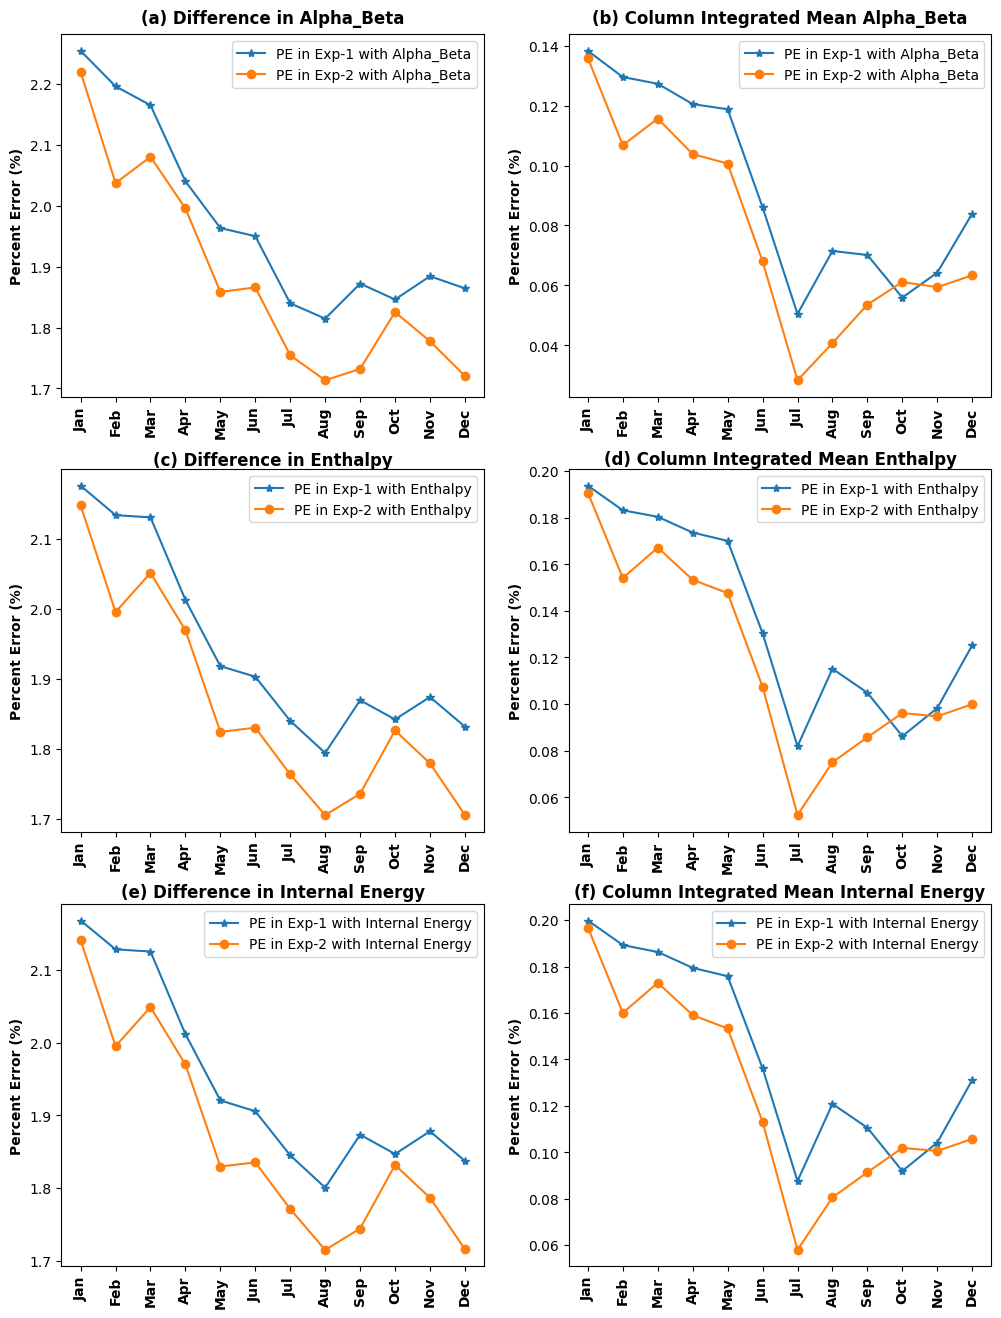

In [307]:
# pe.shape = (2,3,2,12) = 2 Scenarios (mean, difference),
# 3 variables ("Alpha to Beta","Enthalpy","Internal Energy")
# 2 simulations (Exp-1, Exp-2) and 12 months

data = [[pe[1][0][0],pe[1][0][1]],\
        [pe[0][0][0],pe[0][0][1]],\
        [pe[1][1][0],pe[1][1][1]],\
        [pe[0][1][0],pe[0][1][1]],\
        [pe[1][2][0],pe[1][2][1]],\
        [pe[0][2][0],pe[0][2][1]],\
        ]
#Mean,STD, Corr
label = [["PE in Exp-1 with Alpha_Beta","PE in Exp-2 with Alpha_Beta"],\
         ["PE in Exp-1 with Alpha_Beta","PE in Exp-2 with Alpha_Beta"],\
         ["PE in Exp-1 with Enthalpy","PE in Exp-2 with Enthalpy"],\
         ["PE in Exp-1 with Enthalpy","PE in Exp-2 with Enthalpy"],\
         ["PE in Exp-1 with Internal Energy","PE in Exp-2 with Internal Energy"],\
        ["PE in Exp-1 with Internal Energy","PE in Exp-2 with Internal Energy"]]
ylabel = "Percent Error (%)"
        
output = "/kaggle/working/"

plt.style.use('default')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

seq = ["("+i+")" for i in "abcdef"]
titlelbl = ["Difference in Alpha_Beta",\
            "Column Integrated Mean Alpha_Beta",\
            "Difference in Enthalpy",\
            "Column Integrated Mean Enthalpy",\
            "Difference in Internal Energy",\
            "Column Integrated Mean Internal Energy",\
           ]
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
from matplotlib import gridspec

def rowLinePlot(data, label, ylabel, loc_,tx,title):
  
  nrow = 3
  ncol = 2

  fig = plt.figure(figsize=((ncol+1)*4, (nrow+1)*4))
  gs = gridspec.GridSpec(nrow, ncol)
  #,wspace=wspace_,hspace=0.15, top=1.-adjust/(nrow+1),bottom=adjust/(nrow+1), left=0.15, right=0.85)
 
  j = -1
  for i in range(nrow):
    for k in range(ncol):
      j+=1
      ax = plt.subplot(gs[i,k])
      y = np.arange(0,len(data[j][0]))
      ax.plot(y,data[j][0], label = label[j][0], marker = "*")
      ax.plot(y,data[j][1], label = label[j][1], marker = "o")
      
      ax.set_ylabel(ylabel, fontsize = 10, fontweight = "bold")
      ax.set_xticks(y,months,rotation=90,fontsize = 10, fontweight = "bold")

      ax.legend(loc = loc_[j], facecolor = "w")
      ax.text(tx[j][0],tx[j][1],"{}".format(seq[j])+" "+titlelbl[j], 
                 fontweight = 'bold', 
                horizontalalignment='center',fontsize = 12)
       
  plt.savefig(output+title+".jpg",dpi=300)
  plt.show()

loc_ = ["best","best","best","best","best","best"]
tx = [[5.5,2.3],[5.5,0.1475],[5.5,2.205],[5.5,0.203],[5.5,2.2],[5.5,0.21]]
#data, label, ylabel, loc_,tx,title
rowLinePlot(data, label, ylabel, loc_ = loc_,tx=tx,title="secondary thermodynamic")